In [501]:
install.packages("igraph")
library(igraph)

library('igraph')
library('Matrix')
library('pracma')

install.packages('matrixStats')
library(matrixStats)


The downloaded binary packages are in
	/var/folders/m6/4mgxnhd5575fll1p8n3_wcjc0000gn/T//RtmpZKdGNx/downloaded_packages



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu





The downloaded binary packages are in
	/var/folders/m6/4mgxnhd5575fll1p8n3_wcjc0000gn/T//RtmpZKdGNx/downloaded_packages


QUESTION 1A: Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [12]:
probs = c(0.003, 0.004, 0.01, 0.05, 0.1)

[1] "Analytical mean of the degree distribution is : 3"
[1] "Simulated mean of the degree distribution is : 3.026"
[1] "Analytical variance of the  degree distribution is : 2.991"
[1] "Simulated variance of the  degree distribution is : 2.68801201201201"


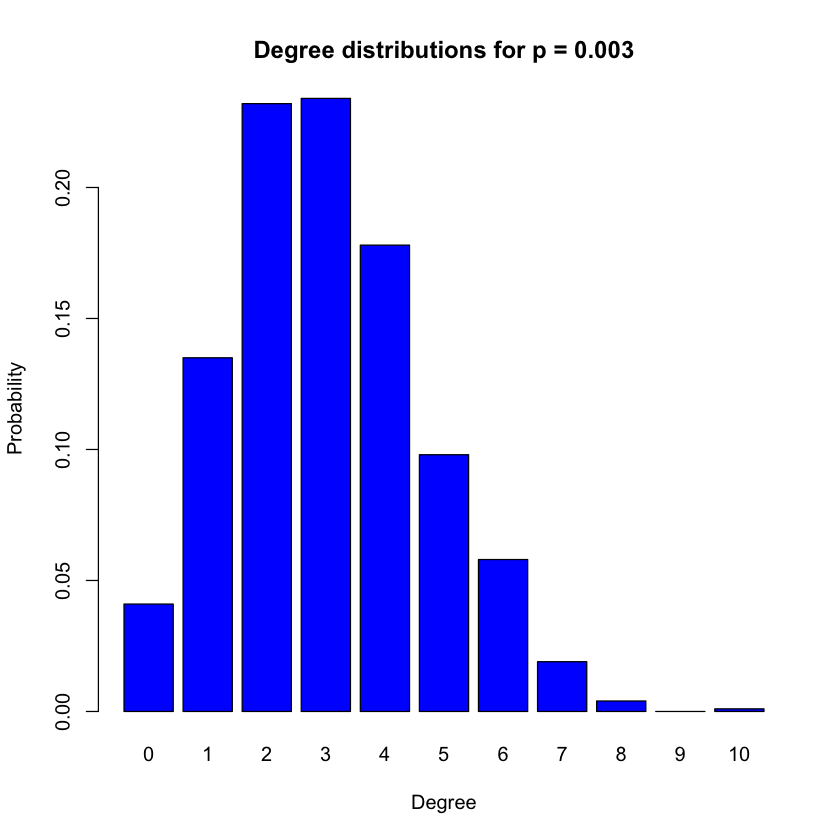

[1] "Analytical mean of the degree distribution is : 4"
[1] "Simulated mean of the degree distribution is : 4.058"
[1] "Analytical variance of the  degree distribution is : 3.984"
[1] "Simulated variance of the  degree distribution is : 4.18081681681682"


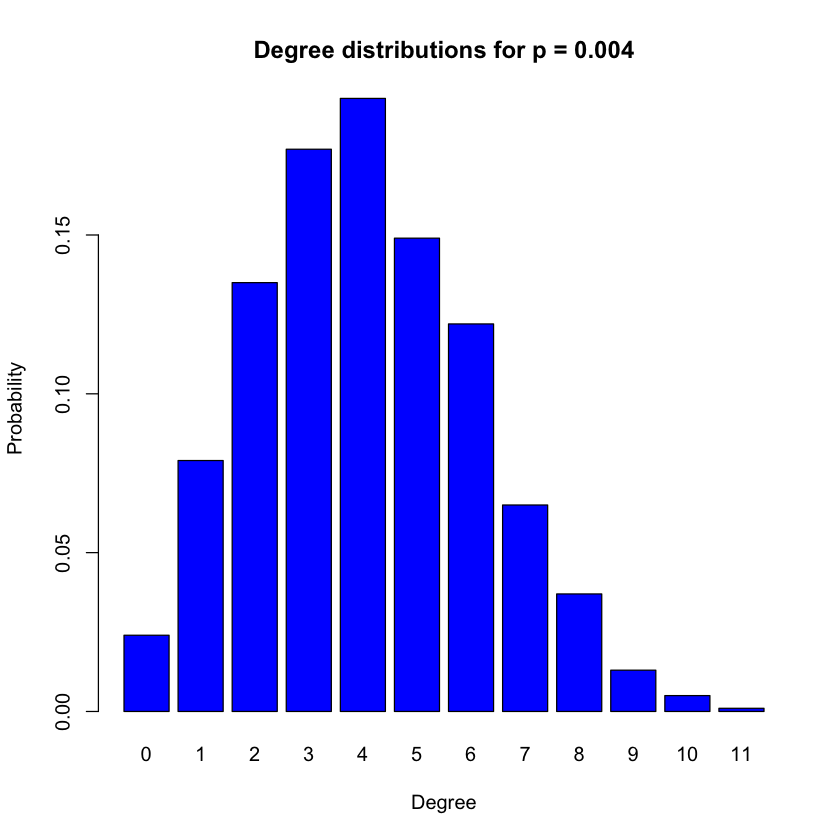

[1] "Analytical mean of the degree distribution is : 10"
[1] "Simulated mean of the degree distribution is : 10.09"
[1] "Analytical variance of the  degree distribution is : 9.9"
[1] "Simulated variance of the  degree distribution is : 10.3562562562563"


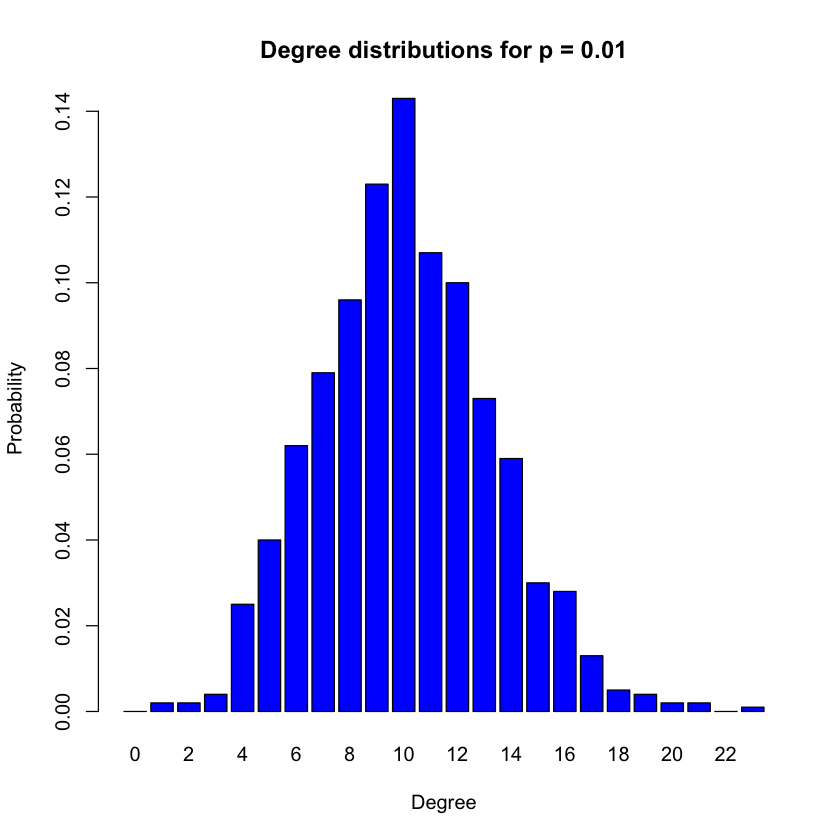

[1] "Analytical mean of the degree distribution is : 50"
[1] "Simulated mean of the degree distribution is : 49.862"
[1] "Analytical variance of the  degree distribution is : 47.5"
[1] "Simulated variance of the  degree distribution is : 46.9178738738739"


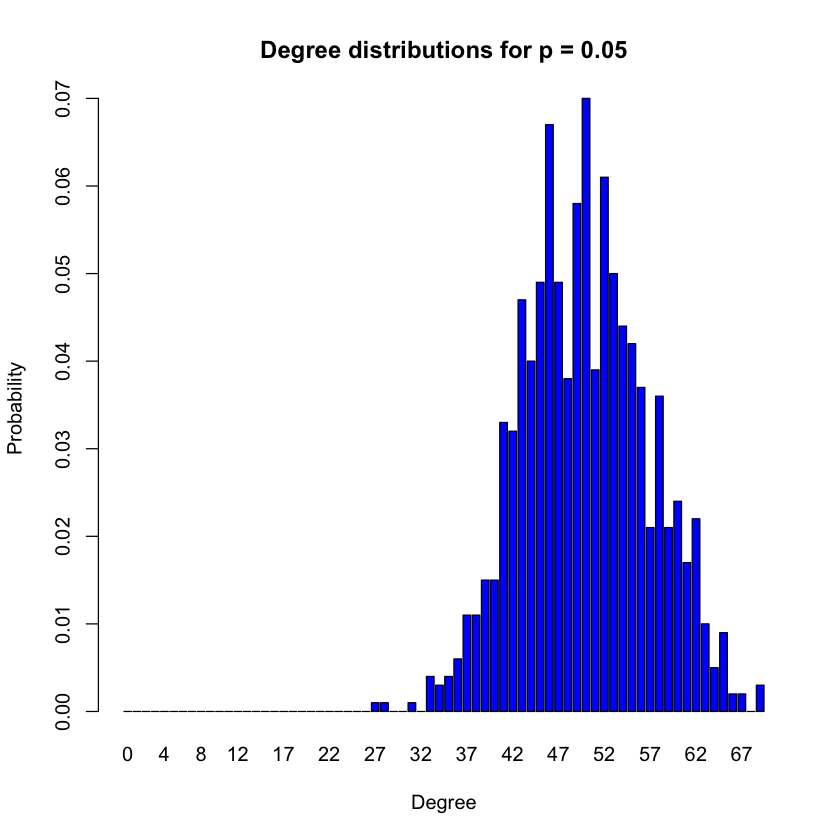

[1] "Analytical mean of the degree distribution is : 100"
[1] "Simulated mean of the degree distribution is : 100.384"
[1] "Analytical variance of the  degree distribution is : 90"
[1] "Simulated variance of the  degree distribution is : 92.487031031031"


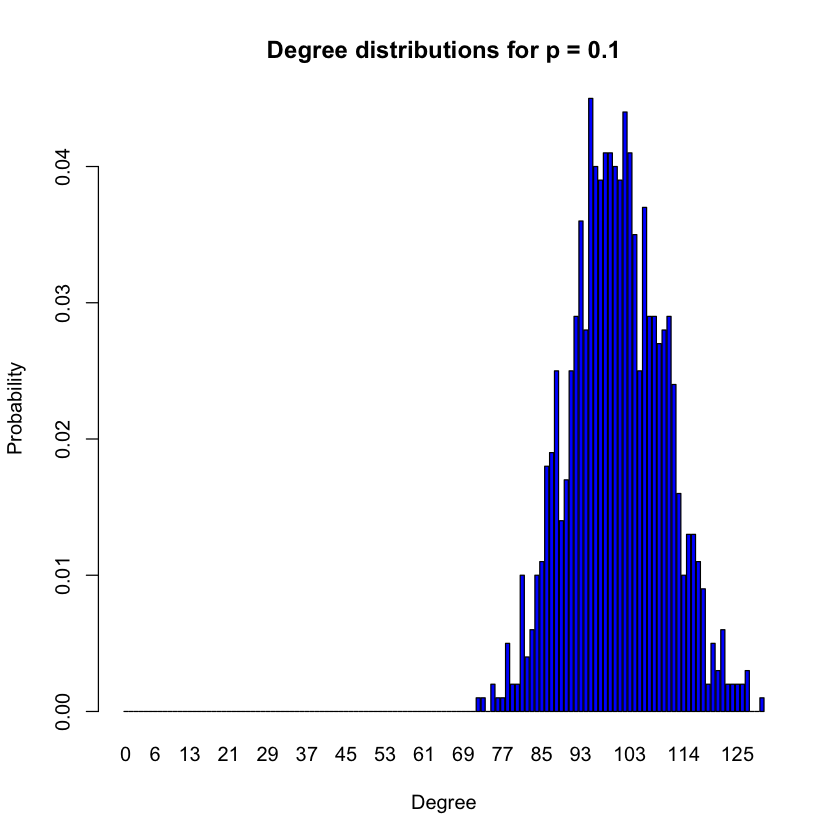

In [18]:
num_nodes <- 1000
for (p in probs){
    graph = sample_gnp(num_nodes, p, directed=FALSE)
    node_deg_dist = degree.distribution(graph)
    xVals = c(0: (length(node_deg_dist)-1))
    barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
        main = paste("Degree distributions for p =", p, sep = " "),col="blue")
    
    analytical_mean = num_nodes * p
    analytical_variance = num_nodes * p * (1-p)
    simulated_mean = mean(degree(graph))
    simulated_variance = var(degree(graph))
    print(paste("Analytical mean of the degree distribution is",":", analytical_mean))
    print(paste("Simulated mean of the degree distribution is",":", simulated_mean))
    print(paste("Analytical variance of the  degree distribution is",":", analytical_variance))
    print(paste("Simulated variance of the  degree distribution is",":", simulated_variance))
}


These are binomial distributions since a given node $v_i$ has n-1 possible nodes it can form an edge with where n is the total number of nodes in the network. Among these, it picks k nodes to form edges. The equation for this turns out to be
$P(deg(v_i)=k)={n-1 \choose k}p^k (1-p)^{n-1-k}$ which is of the form of a binomial distribution.

QUESTION 1B: For each p and n = 1000, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the
probability that a generated network is connected. For one instance of the networks
with that p, find the giant connected component (GCC) if not connected. What is
the diameter of the GCC?

From the discussion sessions, there is a threshold where the nodes will likely be disconnected to them likely being fully connected. This threshold is $p < \frac{ln(n)}{n}$  for likely being disconnected and $p > \frac{ln(n)}{n}$ for likely being connected. Even above this threshold, there is still a possibility that a generated network will be disconnected. Hence, not all random realized network are connected. 

In [110]:
for (p in probs){
    connectedCount_dis = 0
    for(i in c(1:1000)) {
            temp_g = sample_gnp(num_nodes, p, directed = FALSE)
            if(is_connected(temp_g)) {
                connectedCount_dis = connectedCount_dis + 1
            }
        }
    connectivity_prob_dis = connectedCount_dis/1000
    print(paste("Estimated connectivity probability for p =",p,":", connectivity_prob_dis))
}

[1] "Estimated connectivity probability for p = 0.003 : 0"
[1] "Estimated connectivity probability for p = 0.004 : 0"
[1] "Estimated connectivity probability for p = 0.01 : 0.957"
[1] "Estimated connectivity probability for p = 0.05 : 1"
[1] "Estimated connectivity probability for p = 0.1 : 1"


In [63]:
for (p in probs){
    g = sample_gnp(num_nodes, p, directed = FALSE)
    #print(paste("Diameter for p =",p,":", diameter(g, directed=FALSE, unconnected=TRUE)))
    print(paste("Diameter for p =",p,":", max(clusters(g)$csize)))
}

[1] "Diameter for p = 0.003 : 927"
[1] "Diameter for p = 0.004 : 982"
[1] "Diameter for p = 0.01 : 1000"
[1] "Diameter for p = 0.05 : 1000"
[1] "Diameter for p = 0.1 : 1000"


QUESTION 1C: For n = 1000, sweep over values of p from 0 to a pmax that makes the network almost
surely connected and create 100 random networks for each p. $p_{max}$ should be roughly
determined by yourself. Then scatter plot the normalized GCC sizes vs p. Plot a line
of the average normalized GCC sizes for each p along with the scatter plot.

From the lectures, and as described above, the likelihood is very high that the network is connected at $\frac{ln(n)}{n}$, hence this could be a good value for $p_{max}$. Since we would like to include this value in the plot, a value greater than this at 0.01 will be used.

In [71]:
num_nodes = 1000
connectivity_threshold = log(num_nodes)/num_nodes
gcc_threshold = 1/num_nodes
print(paste("p_max:",p_max))
print(paste("GCC threshold:", gcc_threshold))

[1] "p_max: 0.00690775527898214"
[1] "GCC threshold: 0.001"


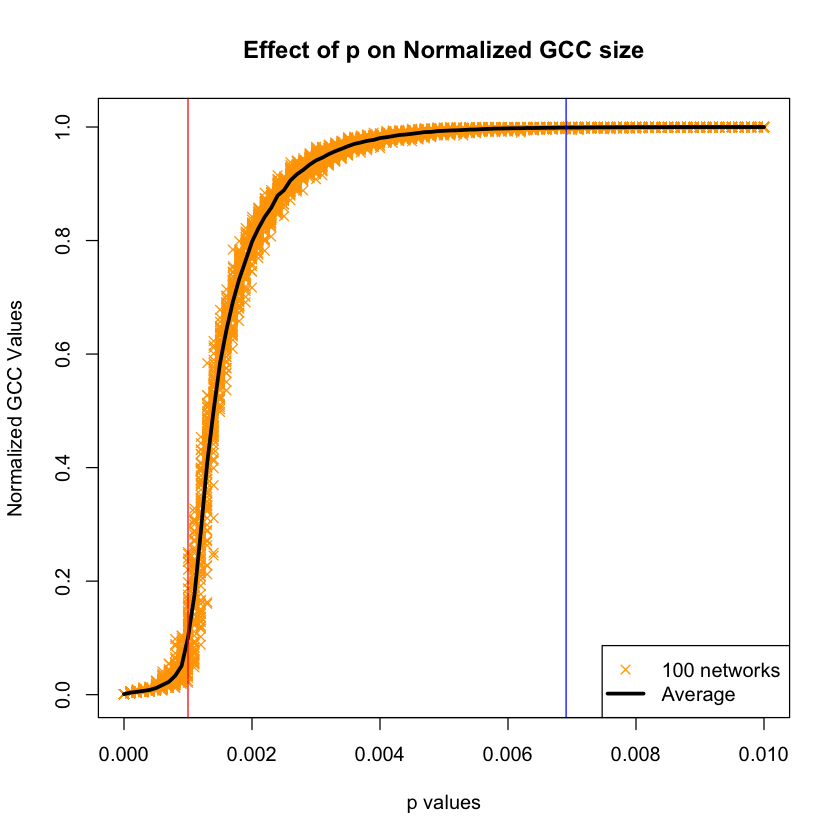

In [75]:
p_sweep = seq(0, 0.01, 0.0001)
avgVals = rep(0, length(p_sweep))
j = 1
plot(1, type = "n", xlab = "p values",
     ylab = "Normalized GCC Values", xlim = c(0, 0.01),
     main = "Effect of p on Normalized GCC size",
     ylim = c(0, 1.01))
for (p in p_sweep) {
    total = 0
    for (i in c(1:100)) {
        g = sample_gnp(num_nodes, p, directed = FALSE)
        comps = clusters(g)
        sz = max(comps$csize)
        normalizedGCC = sz / num_nodes
        total = total + normalizedGCC
        points(p, normalizedGCC, col= 'orange', pch=4)
    }
    avgVals[j] = total / 100
    j = j + 1
}
lines(p_sweep, avgVals, lwd=3.0)
abline(v=gcc_threshold, col="red")
abline(v=connectivity_threshold, col="blue")
legend(x = "bottomright",
       legend = c("100 networks", "Average"),  
       pch = c(4, NA),           
       lty = c(NA, 1),           
       lwd = c(NA, 3.0),
       col = c("orange", 1)
      )

i. Empirically estimate the value of p where a giant connected component starts to
emerge (define your criterion of “emergence”)? Do they match with theoretical
values mentioned or derived in lectures?

Empirically, there is an inflection point at around 0.0008. This looks to be where the GCC emerges. This is very close to the theoretical value found in the lectures and as shown by the red line for the connectivity threshold.

ii. Empirically estimate the value of p where the giant connected component takes
up over 99% of the nodes in almost every experiment.

The value of p where this occurs looks to be around 0.0055. 

QUESTION 1(d) i. Define the average degree of nodes c = n × p = 0.5. Sweep over the number of
nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER
networks with n nodes and edge-formation probabilities p = c/n, as a function
of n. What trend is observed?

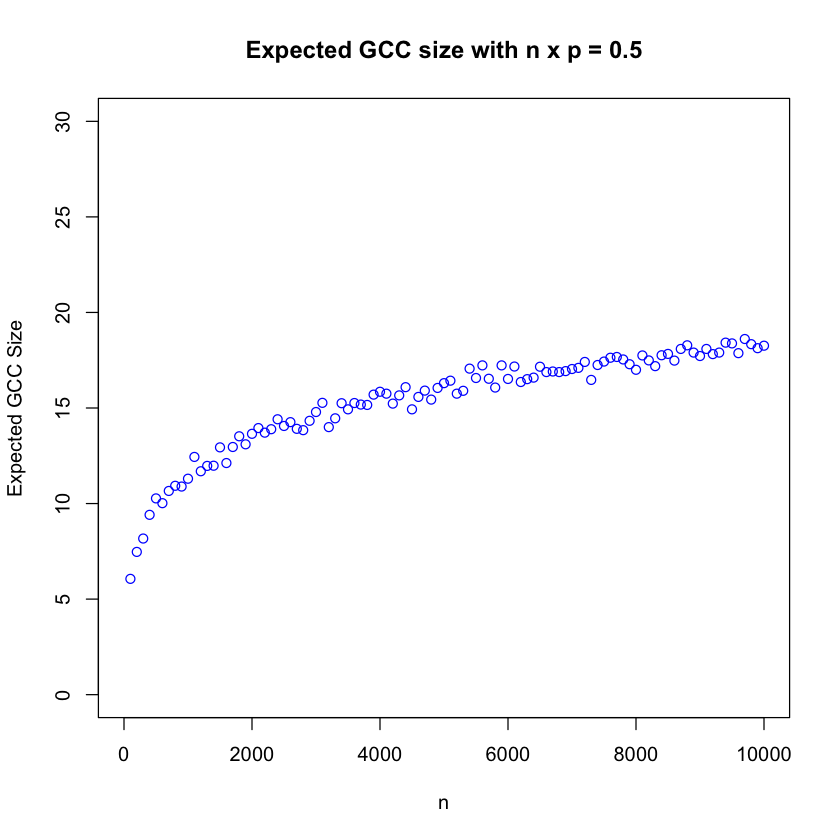

In [84]:
n_sweep = seq(100, 10000, 100)
plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 30),
     main = "Expected GCC size with n x p = 0.5")
for (i in n_sweep) {
        p = 0.5 / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
}

The trend looks logarithmic as n increases.

ii. Repeat the same for c = 1.

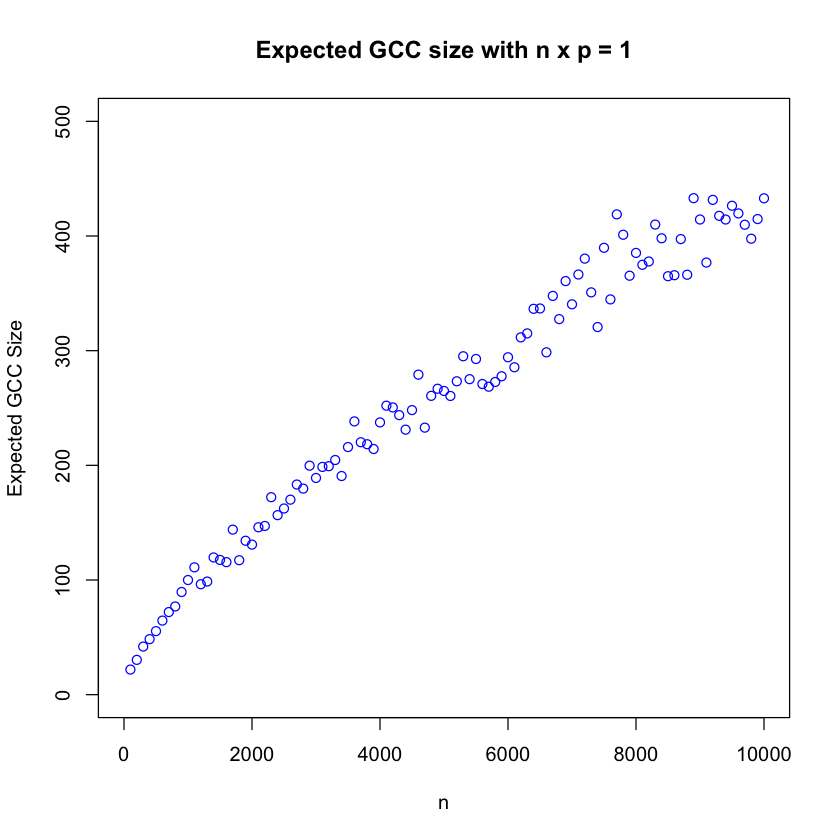

In [88]:
n_sweep = seq(100, 10000, 100)
plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 500),
     main = "Expected GCC size with n x p = 1")
for (i in n_sweep) {
        p = 1 / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
}

The trend looks a bit logarithmic but also looks more linear than part (i). The values become more spread out as n increases if there were a distance from an average line.

iii. Repeat the same for values of c = 1.1, 1.2, 1.3, and show the results for these
three values in a single plot.

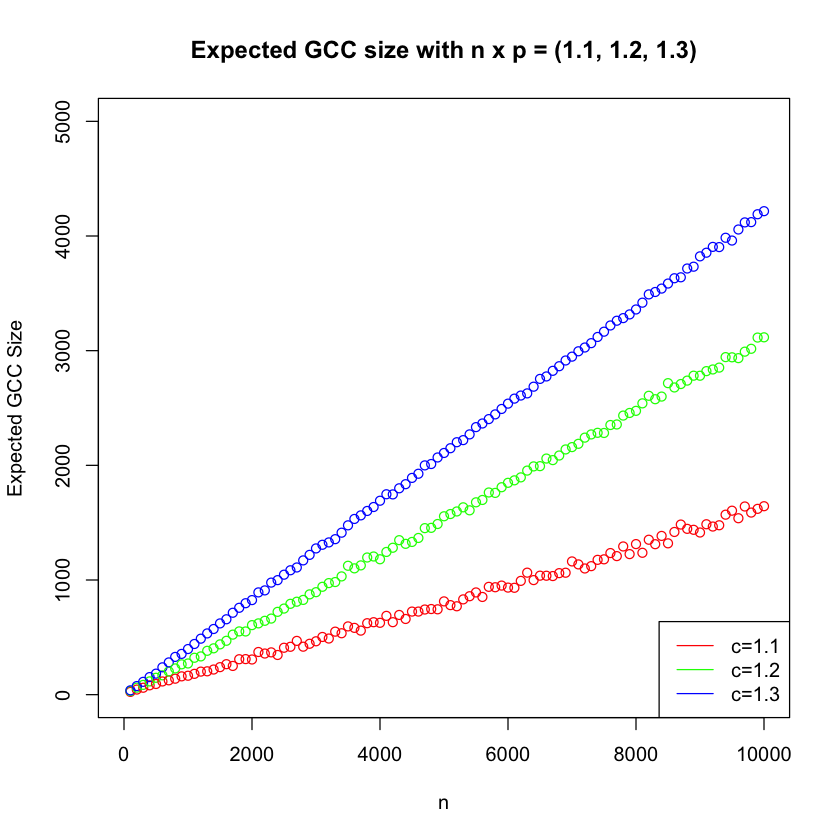

In [80]:
n_sweep = seq(100, 10000, 100)

c_sweep = c(1.1, 1.2, 1.3)
colors = c("red", "green", "blue")

plot(1, type = "n", xlab = "n",
     ylab = "Expected GCC Size", xlim = c(0, 10000), ylim = c(0, 5000),
     main = "Expected GCC size with n x p = (1.1, 1.2, 1.3)")

for (i in n_sweep) {
    for (k in (1 : length(c_sweep))) {
        p = c_sweep[k] / i
        #Expected value calculation
        total = 0
        for (j in c(1:100)) {
            g = sample_gnp(i, p, directed = FALSE)
            comps = clusters(g)
            sz = max(comps$csize)
            total = total + sz
        }
        expected_val = total / 100
        points(i, expected_val, col= colors[k])
    }
}

legend(x = "bottomright",
       legend = c("c=1.1", "c=1.2", "c=1.3"),             
       lty = c(1, 1, 1),           
       col = c("red", "green", "blue")
      )

iv. What is the relation between the expected GCC size and n in each case?

For the three cases above, the trend looks to be linear-increasing between n and expected GCC size. As c increases, the slopes of the lines increase as well.

QUESTION 2: Create networks using preferential attachment model

(a) Create an undirected network with n = 1000 nodes, with preferential attachment
model, where each new node attaches to m = 1 old nodes. Is such a network always
connected?

In [96]:
for (i in seq(0, 100000, 1)){
    g = sample_pa(1000, m=1, directed=FALSE)
    if(!is_connected(g)){
        print("Not connected")
    }
}

As can be seen from running the cell above, testing 100,000 different networks, none were disconnected. This isn't an exhaustive proof that it will always be connected but it does point in that direction. Also in lecture, it is mentioned that this type of graph is connected by its construction.

(b) Use fast greedy method to find the community structure. Measure modularity.

In [320]:
g = sample_pa(1000,m=1,directed=FALSE)
cluster_fast_greedy(g)

IGRAPH clustering fast greedy, groups: 34, mod: 0.93
+ groups:
  $`1`
   [1]  18  31  33  49  51 102 110 123 136 147 150 156 174 188 193 202 231 235
  [19] 237 272 280 290 325 344 346 361 378 442 448 453 476 489 500 505 507 538
  [37] 591 596 600 698 829 833 868 870 926 984
  
  $`2`
   [1]  12  13  48 125 129 168 194 203 241 246 249 262 283 289 292 356 384 423
  [19] 432 477 493 518 531 547 558 565 578 579 599 602 623 628 642 645 713 738
  [37] 749 753 765 816 840 848 849 884 969
  
  + ... omitted several groups/vertices

In [100]:
modularity(cluster_fast_greedy(g))

[1] 0.9315652

(c) Try to generate a larger network with 10000 nodes using the same model. Compute
modularity. How is it compared to the smaller network’s modularity?

In [391]:
g2 = sample_pa(10000, m=1, directed=FALSE)
cluster_fast_greedy(g2)

IGRAPH clustering fast greedy, groups: 112, mod: 0.98
+ groups:
  $`1`
    [1]   34   38   85  104  128  146  305  311  323  346  457  522  559  570
   [15]  607  625  787  898  987  993 1041 1043 1057 1139 1359 1508 1606 1609
   [29] 1656 1738 1846 1919 1934 1954 2027 2031 2225 2239 2249 2271 2319 2335
   [43] 2464 2498 2633 2667 2807 2880 2980 2988 3076 3082 3085 3117 3280 3284
   [57] 3289 3384 3412 3425 3666 3806 3906 3977 4255 4283 4448 4465 4660 4898
   [71] 4905 4955 4996 5041 5078 5120 5333 5398 5425 5509 5670 5698 5825 5894
   [85] 6048 6062 6087 6134 6137 6340 6525 6563 6687 6751 6759 6828 6919 6934
   [99] 6972 7000 7020 7162 7295 7302 7306 7352 7360 7489 7580 7586 7606 7608
  [113] 7739 7743 8046 8060 8062 8093 8100 8173 8192 8209 8231 8241 8292 8317
  + ... omitted several groups/vertices

In [316]:
g2 = sample_pa(10000, m=1, directed=FALSE)
modularity(cluster_fast_greedy(g2))

[1] 0.9778289

Modularity is slightly higher here than for the graph in (b).

(d) Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate
the slope of the plot using linear regression.

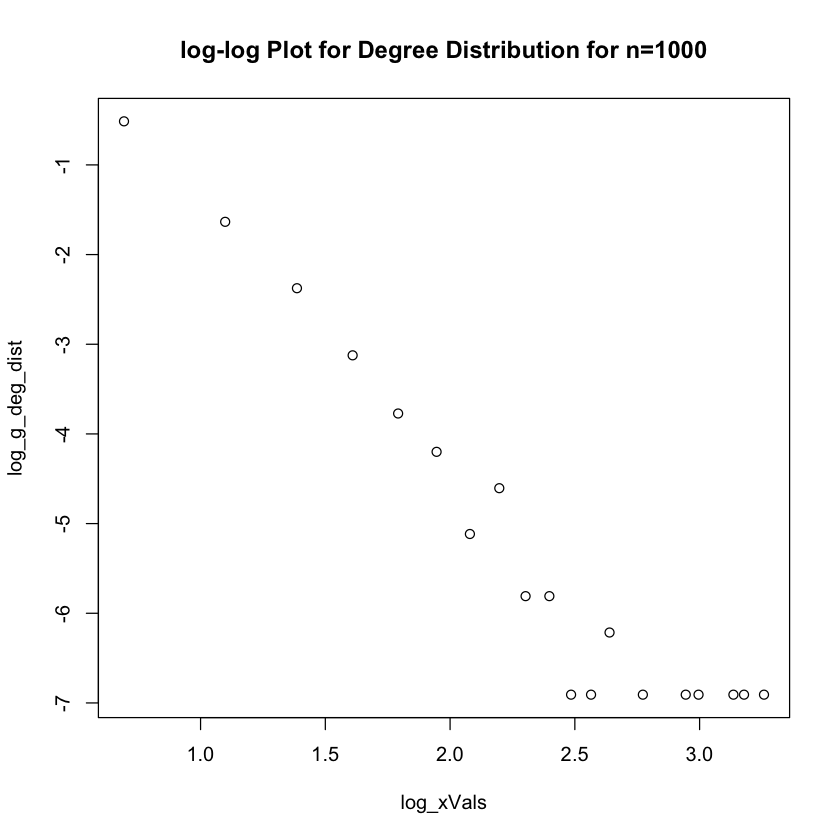

In [164]:
g_deg_dist = degree.distribution(g)
xVals = 1:length(g_deg_dist)
log_g_deg_dist = list()
log_xVals = list()
for(i in 1:length(g_deg_dist)){
    if(g_deg_dist[i] != 0){
        log_g_deg_dist = append(log_g_deg_dist, log(g_deg_dist[i]))
        log_xVals = append(log_xVals, log(i))
    }
}

plot(log_xVals, log_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000")

In [165]:
lm(unlist(log_g_deg_dist) ~ unlist(log_xVals))


Call:
lm(formula = unlist(log_g_deg_dist) ~ unlist(log_xVals))

Coefficients:
      (Intercept)  unlist(log_xVals)  
            1.027             -2.713  


From the above, the slope is approximately -2.713 for n=1000.

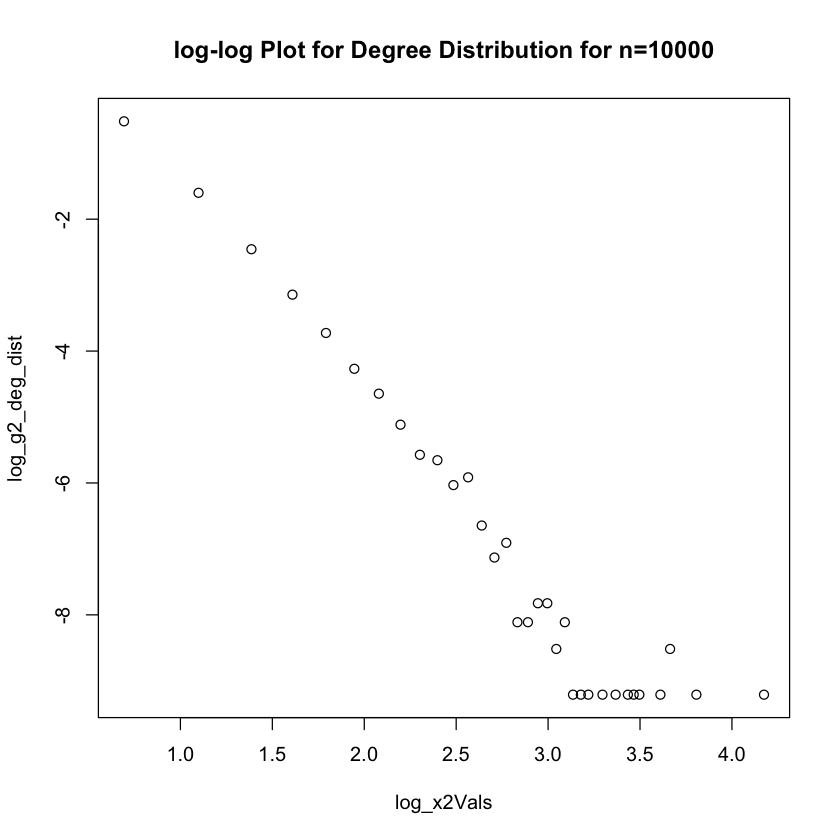

In [162]:
g2_deg_dist = degree.distribution(g2)
x2Vals = 1:length(g2_deg_dist)
log_g2_deg_dist = list()
log_x2Vals = list()
for(i in 1:length(g2_deg_dist)){
    if(g2_deg_dist[i] != 0){
        log_g2_deg_dist = append(log_g2_deg_dist, log(g2_deg_dist[i]))
        log_x2Vals = append(log_x2Vals, log(i))
    }
}

plot(log_x2Vals, log_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000")

In [163]:
lm(unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))


Call:
lm(formula = unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))

Coefficients:
       (Intercept)  unlist(log_x2Vals)  
             1.397              -3.031  


From the above, the slope is approximately -3.031 for n=10000.

(e) In the two networks generated in 2(a) and 2(c), perform the following:
Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

In [396]:
g = sample_pa(1000, m=1, directed=FALSE)
rand_pick_g_deg_dist = rep(0, length(g_deg_dist))
num_picks = 10000
node = sample(gorder(g),1)
rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g,node),1)
    rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
}
rand_pick_g_deg_dist = rand_pick_g_deg_dist/num_picks

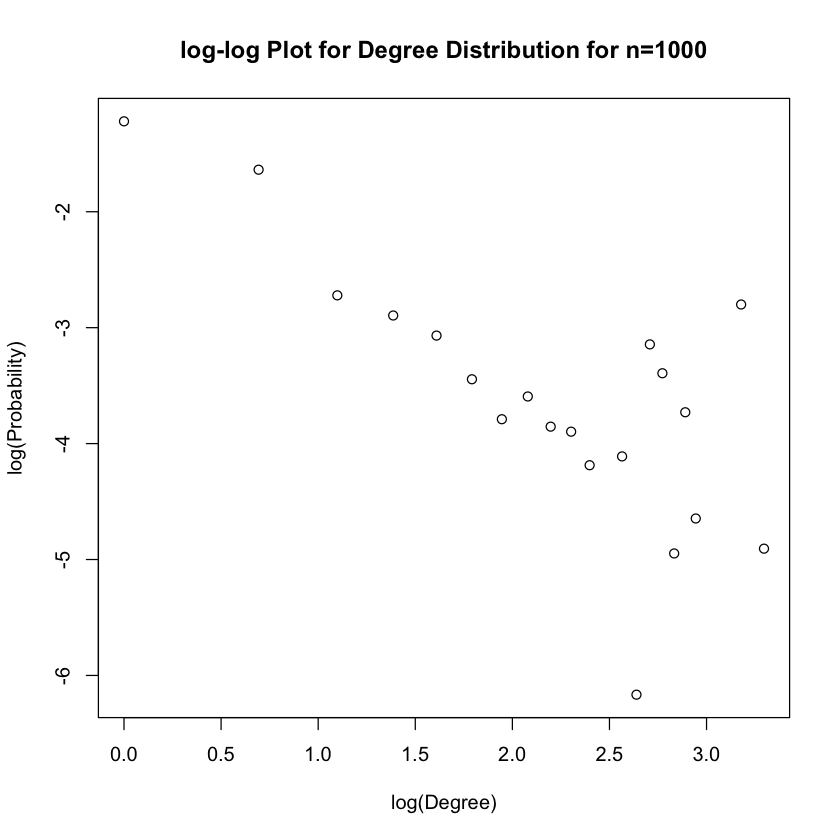

In [397]:
rand_pick_g_xVals = list()
log_rand_pick_g_deg_dist = list()
for(i in 1:length(rand_pick_g_deg_dist)){
    if(rand_pick_g_deg_dist[i] != 0){
        log_rand_pick_g_deg_dist = append(log_rand_pick_g_deg_dist, log(rand_pick_g_deg_dist[i]))
        rand_pick_g_xVals = append(rand_pick_g_xVals, log(i))
    }
}
plot(rand_pick_g_xVals, log_rand_pick_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000", xlab="log(Degree)", ylab="log(Probability)")

In [398]:
lm(unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))


Call:
lm(formula = unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))

Coefficients:
              (Intercept)  unlist(rand_pick_g_xVals)  
                  -1.5270                    -0.9604  


From the above plot and linear regression, there is a rough linear downard trend. The slope is less steep at around -1 compared to the node degree distribution. It's around a third of the magnitude.

In [282]:
rand_pick_g2_deg_dist = rep(0, length(g2_deg_dist))
num_picks = 100000
node = sample(gorder(g2),1)
rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g2,node))
    rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
}
rand_pick_g2_deg_dist = rand_pick_g2_deg_dist/num_picks

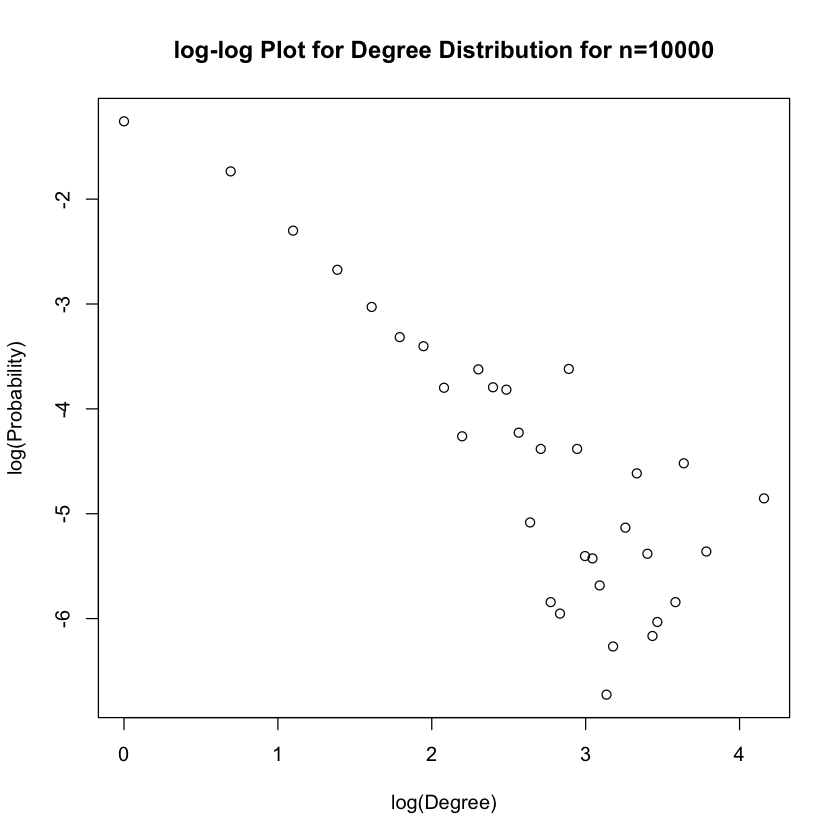

In [283]:
rand_pick_g2_xVals = list()
log_rand_pick_g2_deg_dist = list()
for(i in 1:length(rand_pick_g2_deg_dist)){
    if(rand_pick_g2_deg_dist[i] != 0){
        log_rand_pick_g2_deg_dist = append(log_rand_pick_g2_deg_dist, log(rand_pick_g2_deg_dist[i]))
        rand_pick_g2_xVals = append(rand_pick_g2_xVals, log(i))
    }
}
plot(rand_pick_g2_xVals, log_rand_pick_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000", xlab="log(Degree)", ylab="log(Probability)")

In [284]:
lm(unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))


Call:
lm(formula = unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))

Coefficients:
               (Intercept)  unlist(rand_pick_g2_xVals)  
                    -1.190                      -1.251  


Similar to the graph where n=1000, for n=10000, there is roughly a downward trend and compared to the node degree distribution, the slope is less steep. Here the slope is around -1.25.

(f) Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000.
Show the relationship between the age of nodes and their expected degree through
an appropriate plot.

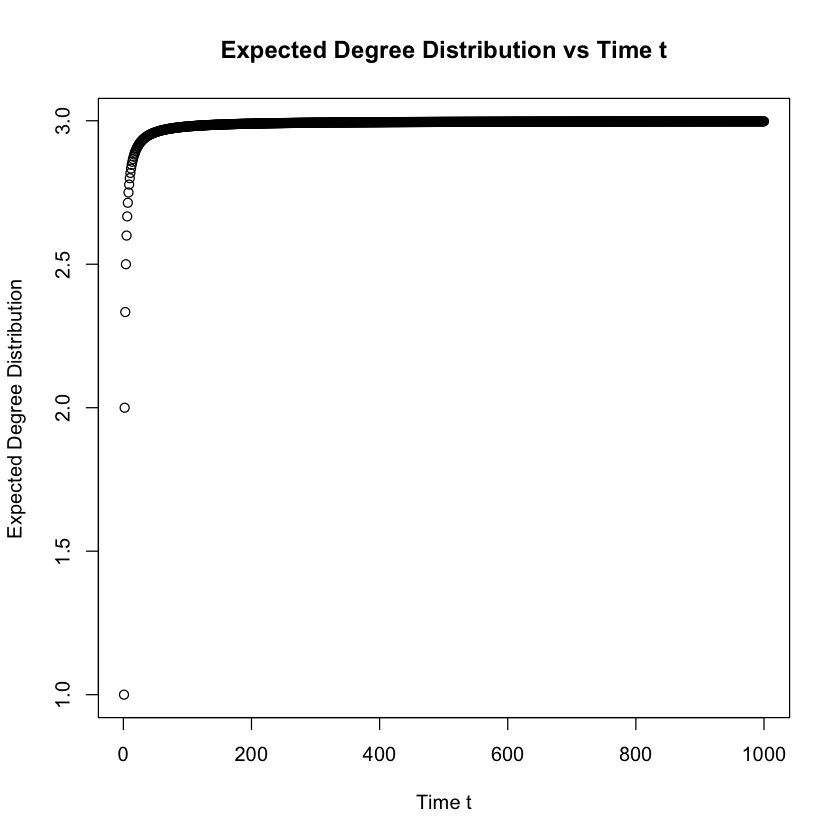

In [291]:
exp_deg_list = list()
for(i in 1:1000){
    temp_g = sample_pa(i, m=1, directed=FALSE)
    deg_dist = degree.distribution(temp_g)
    exp_deg = 0
    for(j in 1:length(deg_dist)){
        exp_deg = exp_deg + (j * deg_dist[j])
    }
    exp_deg_list = append(exp_deg_list, exp_deg)
}
time = c(1:1000)
plot(time, exp_deg_list, main="Expected Degree Distribution vs Time t", xlab="Time t", ylab="Expected Degree Distribution")

This isn't what Tonmoy shared during office hours. Here is the approach he took to finding this:

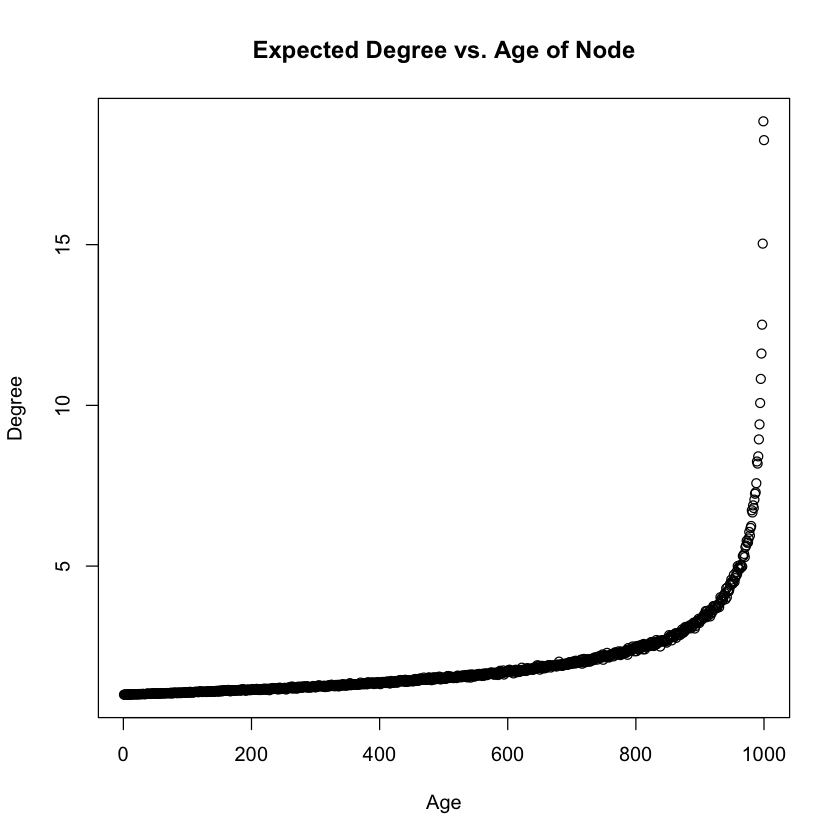

In [297]:
deg = rep(0,1000)
ages = c(1:1000)
for(i in ages){
    g = sample_pa(1000,m=1,directed=FALSE)
    deg = deg + degree(g)
}

deg = deg/1000
plot(rev(ages),deg,main="Expected Degree vs. Age of Node", xlab="Age", ylab="Degree")

(g) Repeat the previous parts (a-f) for m = 2, and m = 5. Compare the results of each
part for different values of m.

m=2:

Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 2 old nodes. Is such a network always connected?

In [336]:
for (i in seq(0, 10000, 1)){
    g = sample_pa(1000, m=2, directed=FALSE)
    if(!is_connected(g)){
        print("Not connected")
    }
}

The number of graphs tested was reduced to 10000 compared to m=1 to reduce runtime. Still, all graphs are connected.

Use fast greedy method to find the community structure. Measure modularity.

In [301]:
cluster_fast_greedy(g)

IGRAPH clustering fast greedy, groups: 20, mod: 0.52
+ groups:
  $`1`
   [1]  90 131 143 146 148 172 173 181 260 300 313 335 398 406 505 526 559 566
  [19] 587 593 607 611 630 659 686 695 700 754 778 840 848 862 877 901 908 988
  
  $`2`
   [1]  75  79 139 202 268 330 431 473 492 583 609 619 635 636 662 668 685 725
  [19] 740 751 752 762 786 793 818 846 852 864 905
  
  $`3`
   [1]   8  19  22  34  38  70  71  87  93  97 111 115 116 117 128 150 167 179
  + ... omitted several groups/vertices

In [302]:
modularity(cluster_fast_greedy(g))

[1] 0.5178583

Try to generate a larger network with 10000 nodes using the same model. Compute
modularity. How is it compared to the smaller network’s modularity?

In [392]:
g2 = sample_pa(10000, m=2, directed=FALSE)
cluster_fast_greedy(g2)

IGRAPH clustering fast greedy, groups: 37, mod: 0.53
+ groups:
  $`1`
    [1]  144  465  888 1044 1175 1188 1210 1366 1667 1720 1750 1811 1826 1836
   [15] 2075 2245 2275 2522 2597 2625 2631 2743 2747 2791 2796 3118 3119 3364
   [29] 3402 3404 3455 3693 3788 3809 3895 3899 3921 3950 4244 4531 4643 4646
   [43] 4761 4782 4911 4981 4996 5049 5167 5399 5538 5568 5593 5670 5868 5869
   [57] 5872 5968 6112 6169 6208 6249 6316 6523 6570 6695 6746 6755 6836 7013
   [71] 7045 7058 7223 7289 7367 7446 7455 7491 7538 7624 7669 7679 7699 7701
   [85] 7706 7818 7962 7963 8091 8155 8327 8355 8434 8509 8513 8652 8658 8679
   [99] 8684 8881 9054 9155 9206 9249 9328 9330 9489 9576 9607 9762 9791 9830
  [113] 9847 9878
  + ... omitted several groups/vertices

In [369]:
g2 = sample_pa(10000, m=2, directed=FALSE)
modularity(cluster_fast_greedy(g2))

[1] 0.5305322

Here, the modularity is slightly greater for n=10000 compared to n=1000.

Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate
the slope of the plot using linear regression.

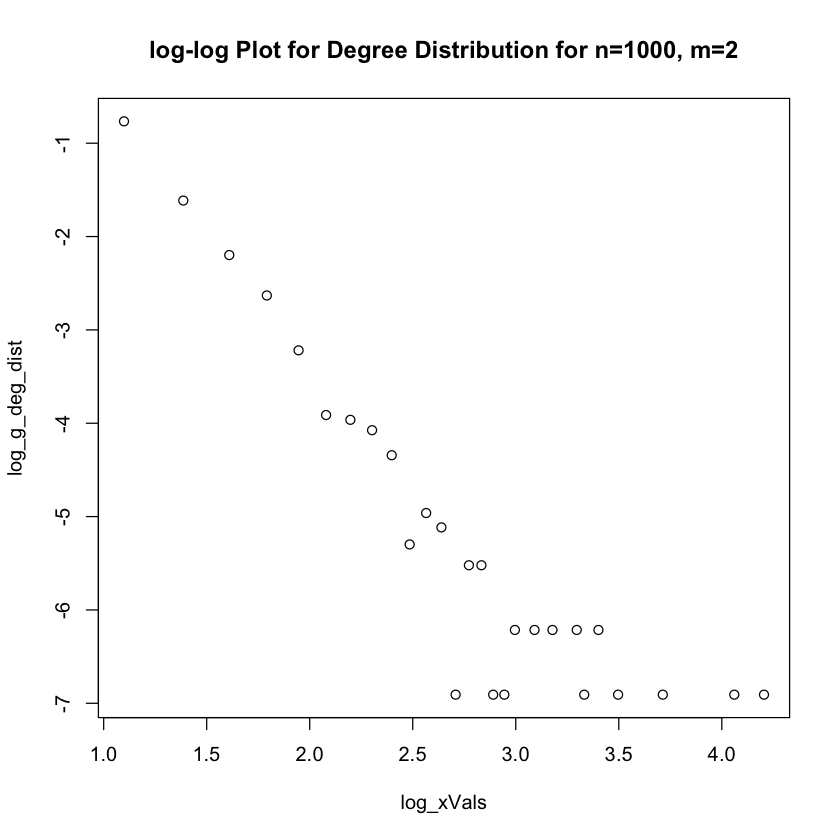

In [337]:
g_deg_dist = degree.distribution(g)
xVals = 1:length(g_deg_dist)
log_g_deg_dist = list()
log_xVals = list()
for(i in 1:length(g_deg_dist)){
    if(g_deg_dist[i] != 0){
        log_g_deg_dist = append(log_g_deg_dist, log(g_deg_dist[i]))
        log_xVals = append(log_xVals, log(i))
    }
}

plot(log_xVals, log_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000, m=2")

In [338]:
lm(unlist(log_g_deg_dist) ~ unlist(log_xVals))


Call:
lm(formula = unlist(log_g_deg_dist) ~ unlist(log_xVals))

Coefficients:
      (Intercept)  unlist(log_xVals)  
           0.7303            -2.1684  


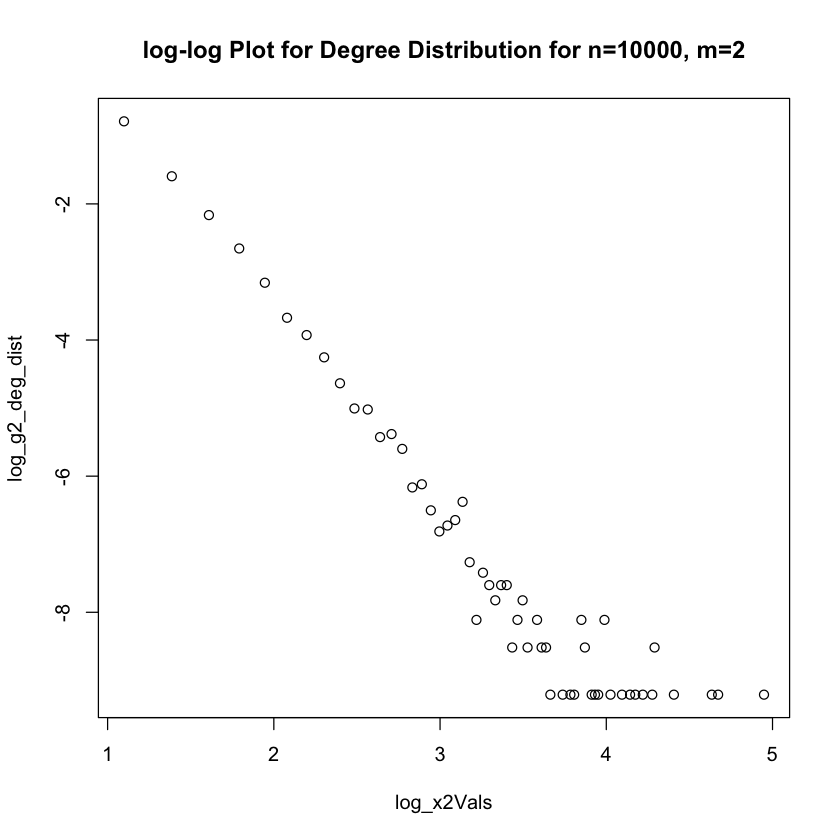

In [370]:
g2_deg_dist = degree.distribution(g2)
x2Vals = 1:length(g2_deg_dist)
log_g2_deg_dist = list()
log_x2Vals = list()
for(i in 1:length(g2_deg_dist)){
    if(g2_deg_dist[i] != 0){
        log_g2_deg_dist = append(log_g2_deg_dist, log(g2_deg_dist[i]))
        log_x2Vals = append(log_x2Vals, log(i))
    }
}

plot(log_x2Vals, log_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000, m=2")

In [371]:
lm(unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))


Call:
lm(formula = unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))

Coefficients:
       (Intercept)  unlist(log_x2Vals)  
             1.268              -2.545  


From the above, for n=1000, the slope is around -2.2. For n=10000, the slope is around -2.55.

In the two networks generated in above, perform the following: Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

In [353]:
g_deg_dist = degree.distribution(g)
rand_pick_g_deg_dist = rep(0, length(g_deg_dist))
num_picks = 10000
node = sample(gorder(g),1)
rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g,node),1)
    rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
}
rand_pick_g_deg_dist = rand_pick_g_deg_dist/num_picks

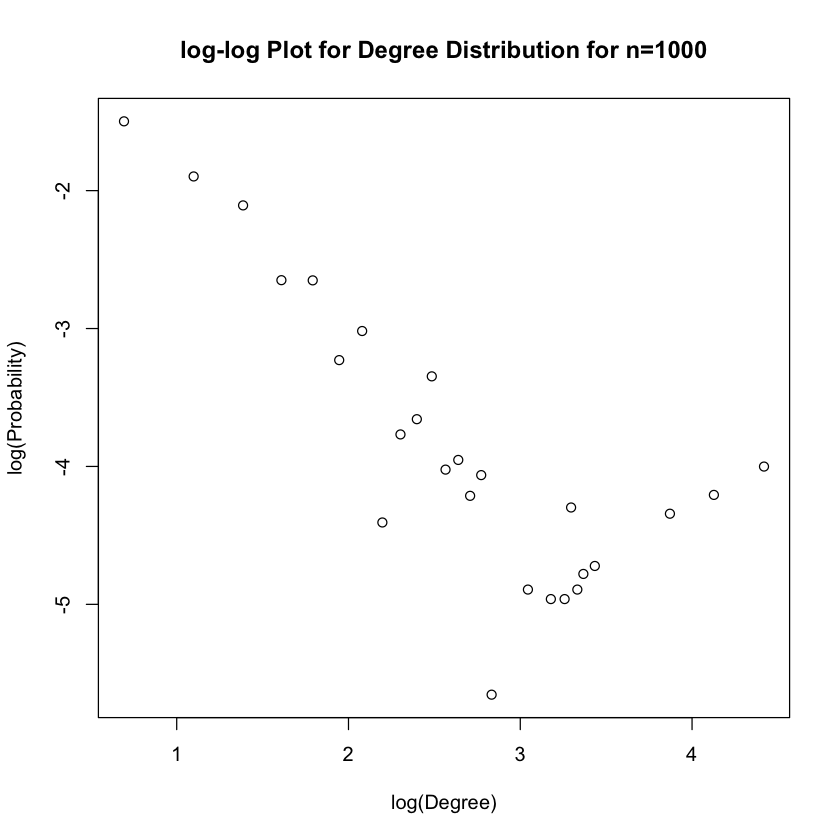

In [314]:
rand_pick_g_xVals = list()
log_rand_pick_g_deg_dist = list()
for(i in 1:length(rand_pick_g_deg_dist)){
    if(rand_pick_g_deg_dist[i] != 0){
        log_rand_pick_g_deg_dist = append(log_rand_pick_g_deg_dist, log(rand_pick_g_deg_dist[i]))
        rand_pick_g_xVals = append(rand_pick_g_xVals, log(i))
    }
}
plot(rand_pick_g_xVals, log_rand_pick_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000", xlab="log(Degree)", ylab="log(Probability)")

In [315]:
lm(unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))


Call:
lm(formula = unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))

Coefficients:
              (Intercept)  unlist(rand_pick_g_xVals)  
                  -1.4442                    -0.9101  


In [350]:
g2_deg_dist = degree.distribution(g2)
rand_pick_g2_deg_dist = rep(0, length(g2_deg_dist))
num_picks = 100000
node = sample(gorder(g2),1)
rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g2,node))
    rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
}
rand_pick_g2_deg_dist = rand_pick_g2_deg_dist/num_picks

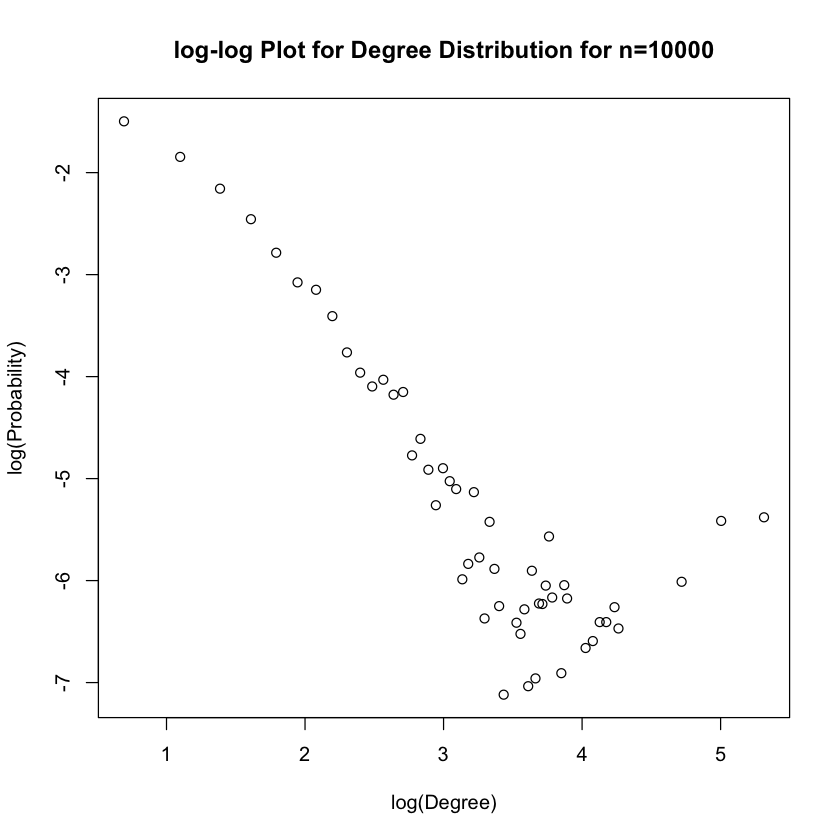

In [351]:
rand_pick_g2_xVals = list()
log_rand_pick_g2_deg_dist = list()
for(i in 1:length(rand_pick_g2_deg_dist)){
    if(rand_pick_g2_deg_dist[i] != 0){
        log_rand_pick_g2_deg_dist = append(log_rand_pick_g2_deg_dist, log(rand_pick_g2_deg_dist[i]))
        rand_pick_g2_xVals = append(rand_pick_g2_xVals, log(i))
    }
}
plot(rand_pick_g2_xVals, log_rand_pick_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000", xlab="log(Degree)", ylab="log(Probability)")

In [352]:
lm(unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))


Call:
lm(formula = unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))

Coefficients:
               (Intercept)  unlist(rand_pick_g2_xVals)  
                   -0.9957                     -1.3197  


Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

Initial approach:

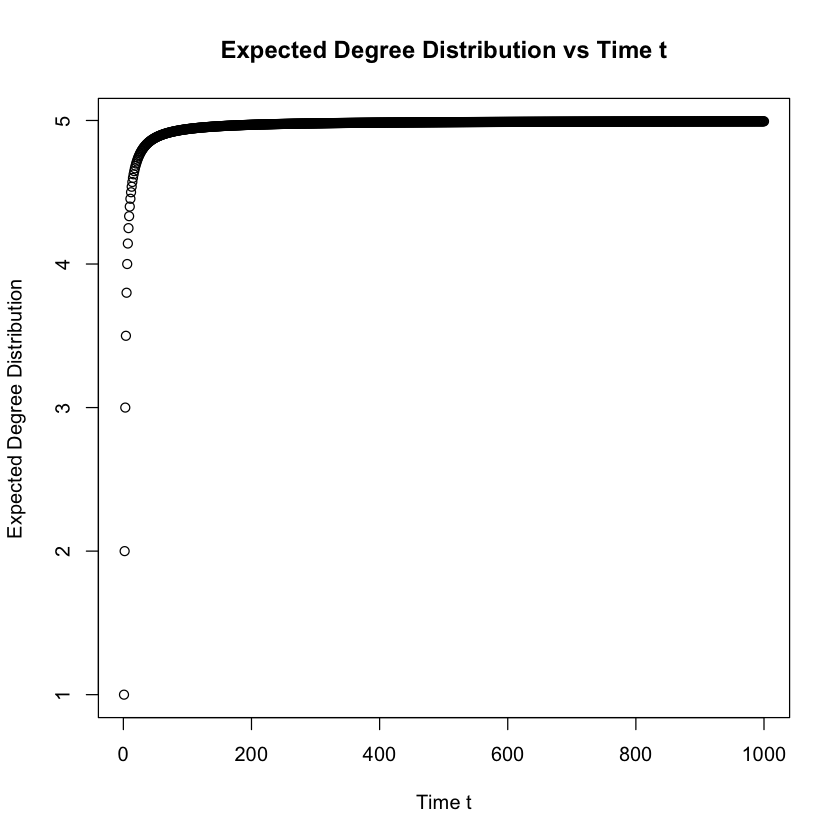

In [355]:
exp_deg_list = list()
for(i in 1:1000){
    temp_g = sample_pa(i, m=2, directed=FALSE)
    deg_dist = degree.distribution(temp_g)
    exp_deg = 0
    for(j in 1:length(deg_dist)){
        exp_deg = exp_deg + (j * deg_dist[j])
    }
    exp_deg_list = append(exp_deg_list, exp_deg)
}
time = c(1:1000)
plot(time, exp_deg_list, main="Expected Degree Distribution vs Time t", xlab="Time t", ylab="Expected Degree Distribution")

Approach from office hours:

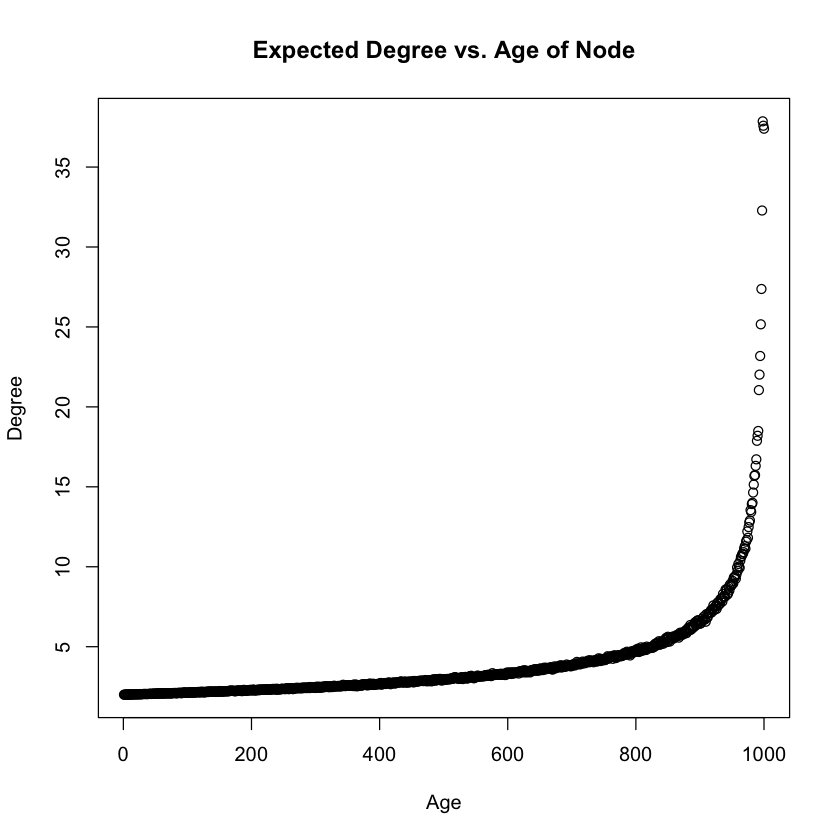

In [354]:
deg = rep(0,1000)
ages = c(1:1000)
for(i in ages){
    g = sample_pa(1000,m=2,directed=FALSE)
    deg = deg + degree(g)
}

deg = deg/1000
plot(rev(ages),deg,main="Expected Degree vs. Age of Node", xlab="Age", ylab="Degree")

m=5:

Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 5 old nodes. Is such a network always connected?


In [356]:
for (i in seq(0, 10000, 1)){
    g = sample_pa(1000, m=5, directed=FALSE)
    if(!is_connected(g)){
        print("Not connected")
    }
}

Similar to the previous values of m, the graph is always connected here.

Use fast greedy method to find the community structure. Measure modularity.

In [394]:
g = sample_pa(1000, m=5, directed=FALSE)
cluster_fast_greedy(g)

IGRAPH clustering fast greedy, groups: 11, mod: 0.28
+ groups:
  $`1`
    [1]   2   6   7   8  11  18  22  34  35  44  45  46  48  56  60  61  70  71
   [19]  76  78  80  82  83  85  86  98  99 101 103 104 107 108 115 116 120 125
   [37] 126 128 130 131 135 143 144 149 153 154 156 160 169 170 171 172 180 181
   [55] 188 200 204 206 209 212 219 228 235 236 241 245 256 266 274 275 278 281
   [73] 282 289 296 297 309 315 317 325 328 336 346 347 348 349 350 360 380 387
   [91] 393 397 398 399 401 403 408 415 416 417 421 424 432 435 446 451 464 465
  [109] 472 476 482 486 490 492 495 496 510 516 517 518 520 524 529 530 556 560
  [127] 568 574 579 581 582 603 608 610 630 631 632 633 637 641 648 650 651 653
  [145] 656 657 658 660 668 676 683 685 686 688 695 696 700 710 715 723 731 733
  + ... omitted several groups/vertices

In [ ]:
modularity(cluster_fast_greedy(g))

[1] 0.2766824

Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

In [395]:
g2 = sample_pa(10000, m=5, directed=FALSE)
cluster_fast_greedy(g2)

IGRAPH clustering fast greedy, groups: 18, mod: 0.27
+ groups:
  $`1`
    [1]  348  373  566  825  891  995 1138 1243 1261 1325 1432 1471 1478 1494
   [15] 1560 1711 1731 1759 1796 1936 1990 2015 2077 2105 2118 2120 2155 2241
   [29] 2255 2301 2329 2534 2537 2644 2752 2796 2813 2887 2909 3038 3095 3117
   [43] 3121 3216 3370 3428 3434 3465 3498 3529 3534 3589 3616 3639 3665 3716
   [57] 3815 3827 3829 3899 3992 4003 4009 4021 4038 4094 4111 4133 4141 4232
   [71] 4256 4359 4468 4521 4527 4548 4579 4715 4731 4745 4759 4886 4893 4974
   [85] 5049 5060 5071 5132 5175 5182 5223 5340 5458 5476 5483 5495 5553 5628
   [99] 5632 5644 5664 5733 5737 5760 5775 5833 5910 5958 5977 6115 6125 6145
  [113] 6372 6374 6401 6428 6434 6438 6477 6549 6585 6609 6680 6695 6697 6781
  + ... omitted several groups/vertices

In [365]:
g2 = sample_pa(10000, m=5, directed=FALSE)
modularity(cluster_fast_greedy(g2))

[1] 0.2779507

Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot using linear regression.

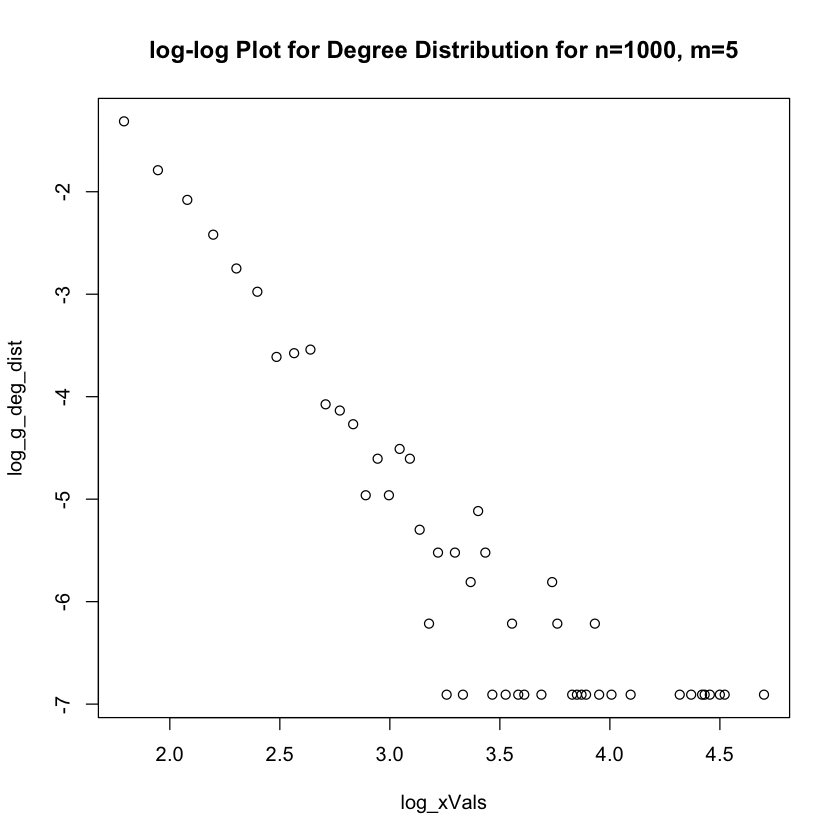

In [379]:
g = sample_pa(1000, m=5, directed=FALSE)
g_deg_dist = degree.distribution(g)
xVals = 1:length(g_deg_dist)
log_g_deg_dist = list()
log_xVals = list()
for(i in 1:length(g_deg_dist)){
    if(g_deg_dist[i] != 0){
        log_g_deg_dist = append(log_g_deg_dist, log(g_deg_dist[i]))
        log_xVals = append(log_xVals, log(i))
    }
}

plot(log_xVals, log_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000, m=5")

In [380]:
lm(unlist(log_g_deg_dist) ~ unlist(log_xVals))


Call:
lm(formula = unlist(log_g_deg_dist) ~ unlist(log_xVals))

Coefficients:
      (Intercept)  unlist(log_xVals)  
            1.390             -2.038  


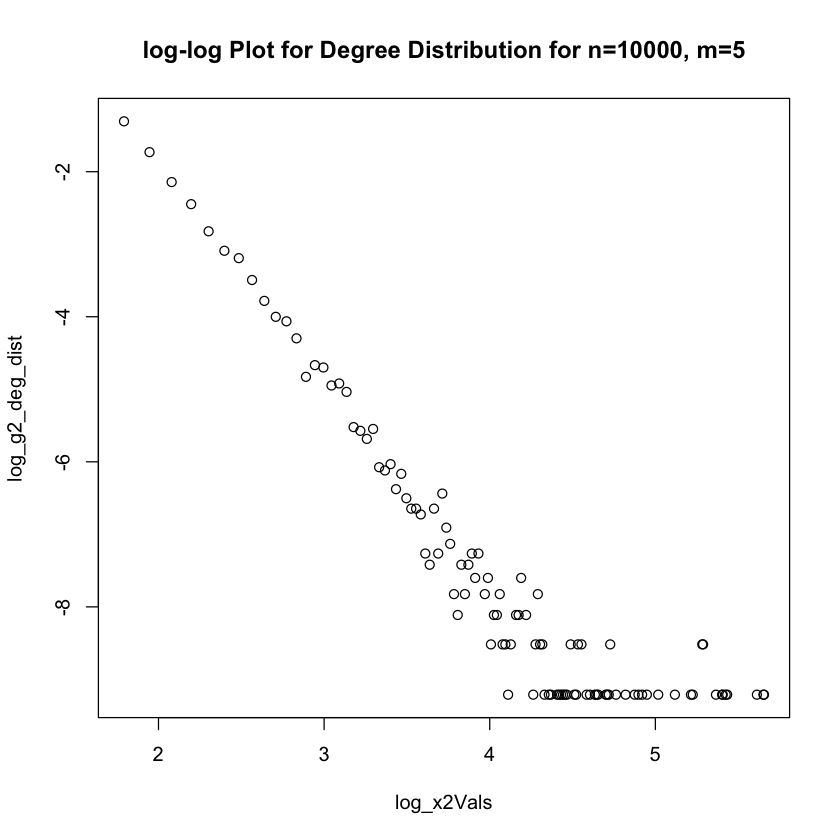

In [377]:
g2 = sample_pa(10000, m=5, directed=FALSE)
g2_deg_dist = degree.distribution(g2)
x2Vals = 1:length(g2_deg_dist)
log_g2_deg_dist = list()
log_x2Vals = list()
for(i in 1:length(g2_deg_dist)){
    if(g2_deg_dist[i] != 0){
        log_g2_deg_dist = append(log_g2_deg_dist, log(g2_deg_dist[i]))
        log_x2Vals = append(log_x2Vals, log(i))
    }
}

plot(log_x2Vals, log_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000, m=5")

In [378]:
lm(unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))


Call:
lm(formula = unlist(log_g2_deg_dist) ~ unlist(log_x2Vals))

Coefficients:
       (Intercept)  unlist(log_x2Vals)  
             1.322              -2.177  


In the two networks generated in above, perform the following: Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?

In [381]:
g_deg_dist = degree.distribution(g)
rand_pick_g_deg_dist = rep(0, length(g_deg_dist))
num_picks = 10000
node = sample(gorder(g),1)
rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g,node),1)
    rand_pick_g_deg_dist[length(neighbors(g,node))] = rand_pick_g_deg_dist[length(neighbors(g,node))] + 1
}
rand_pick_g_deg_dist = rand_pick_g_deg_dist/num_picks

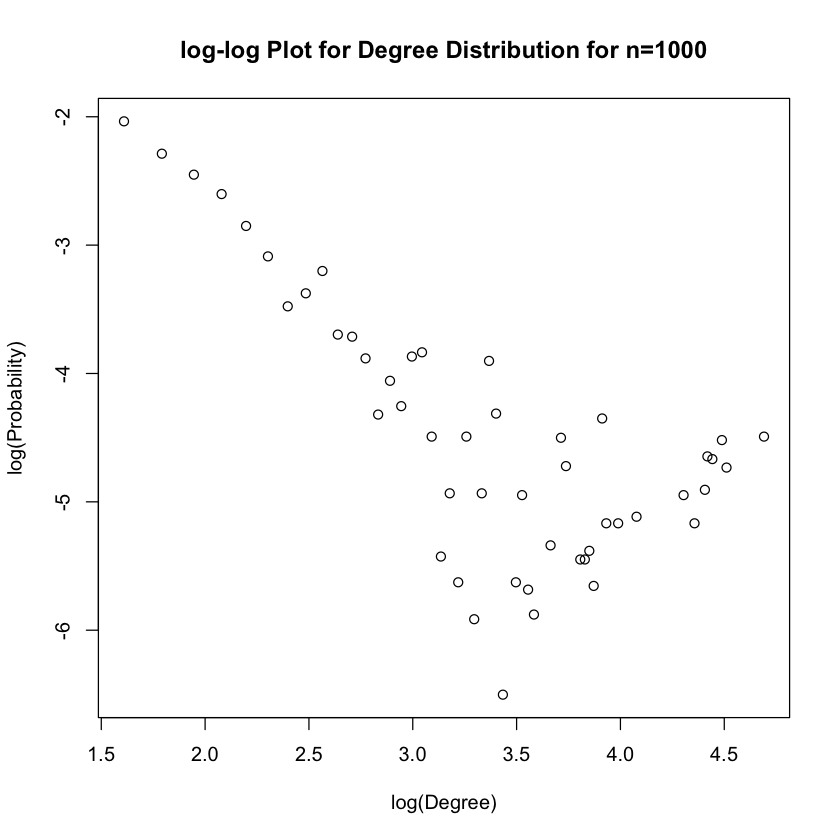

In [382]:
rand_pick_g_xVals = list()
log_rand_pick_g_deg_dist = list()
for(i in 1:length(rand_pick_g_deg_dist)){
    if(rand_pick_g_deg_dist[i] != 0){
        log_rand_pick_g_deg_dist = append(log_rand_pick_g_deg_dist, log(rand_pick_g_deg_dist[i]))
        rand_pick_g_xVals = append(rand_pick_g_xVals, log(i))
    }
}
plot(rand_pick_g_xVals, log_rand_pick_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000", xlab="log(Degree)", ylab="log(Probability)")

In [383]:
lm(unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))


Call:
lm(formula = unlist(log_rand_pick_g_deg_dist) ~ unlist(rand_pick_g_xVals))

Coefficients:
              (Intercept)  unlist(rand_pick_g_xVals)  
                  -1.2840                    -0.9567  


In [384]:
g2_deg_dist = degree.distribution(g2)
rand_pick_g2_deg_dist = rep(0, length(g2_deg_dist))
num_picks = 100000
node = sample(gorder(g2),1)
rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
for(i in 1:num_picks){
    node = sample(neighbors(g2,node))
    rand_pick_g2_deg_dist[length(neighbors(g2,node))] = rand_pick_g2_deg_dist[length(neighbors(g2,node))] + 1
}
rand_pick_g2_deg_dist = rand_pick_g2_deg_dist/num_picks

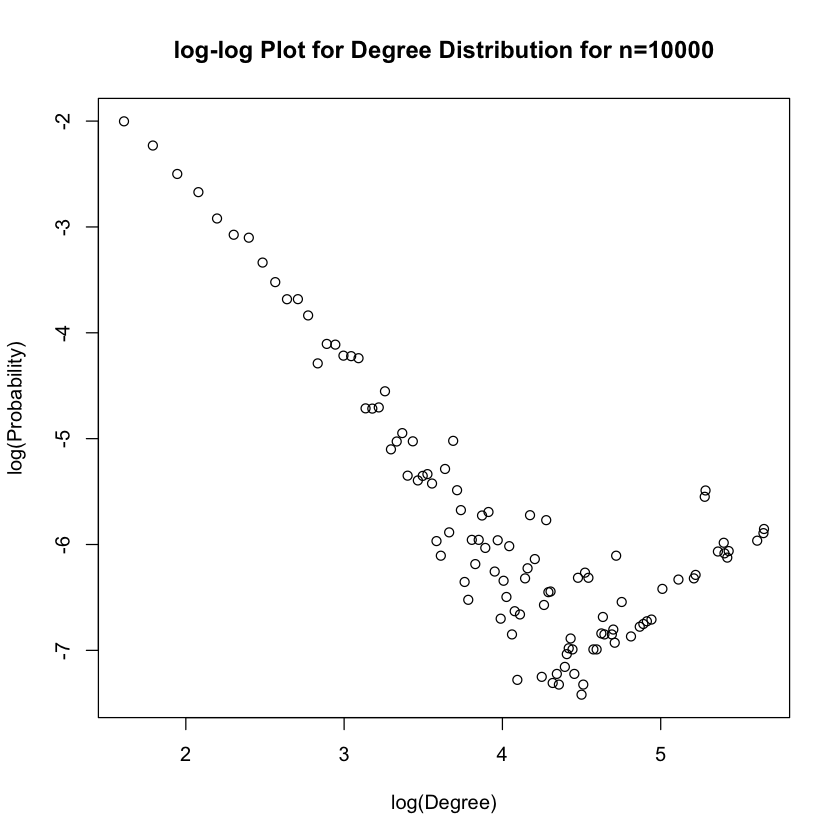

In [385]:
rand_pick_g2_xVals = list()
log_rand_pick_g2_deg_dist = list()
for(i in 1:length(rand_pick_g2_deg_dist)){
    if(rand_pick_g2_deg_dist[i] != 0){
        log_rand_pick_g2_deg_dist = append(log_rand_pick_g2_deg_dist, log(rand_pick_g2_deg_dist[i]))
        rand_pick_g2_xVals = append(rand_pick_g2_xVals, log(i))
    }
}
plot(rand_pick_g2_xVals, log_rand_pick_g2_deg_dist, main="log-log Plot for Degree Distribution for n=10000", xlab="log(Degree)", ylab="log(Probability)")

In [386]:
lm(unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))


Call:
lm(formula = unlist(log_rand_pick_g2_deg_dist) ~ unlist(rand_pick_g2_xVals))

Coefficients:
               (Intercept)  unlist(rand_pick_g2_xVals)  
                    -1.249                      -1.125  


Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

Initial approach:

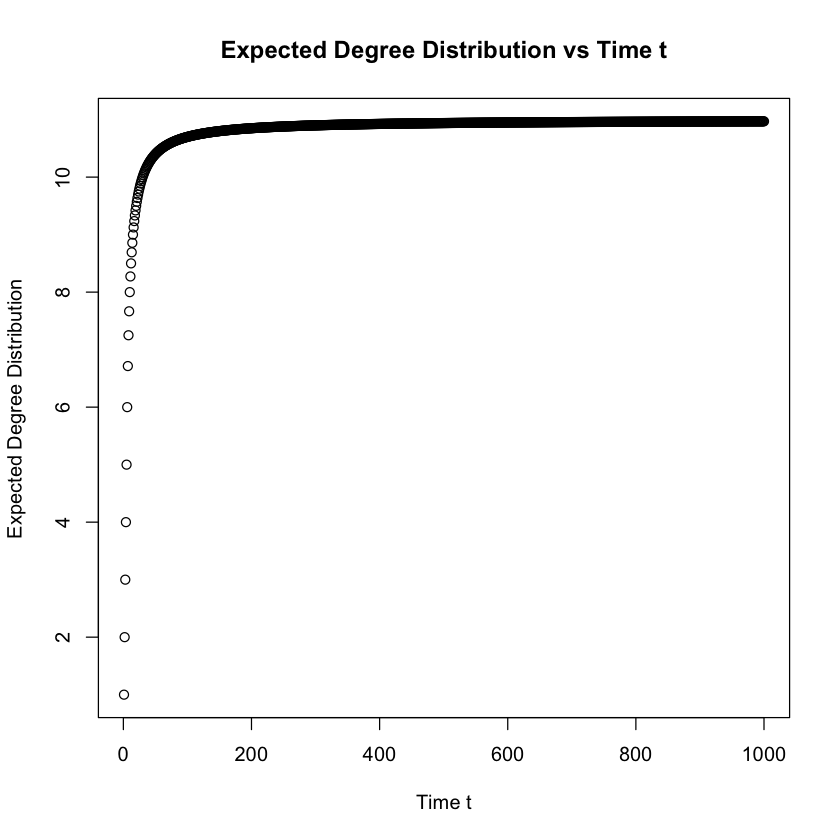

In [387]:
exp_deg_list = list()
for(i in 1:1000){
    temp_g = sample_pa(i, m=5, directed=FALSE)
    deg_dist = degree.distribution(temp_g)
    exp_deg = 0
    for(j in 1:length(deg_dist)){
        exp_deg = exp_deg + (j * deg_dist[j])
    }
    exp_deg_list = append(exp_deg_list, exp_deg)
}
time = c(1:1000)
plot(time, exp_deg_list, main="Expected Degree Distribution vs Time t", xlab="Time t", ylab="Expected Degree Distribution")

Approach from office hours:

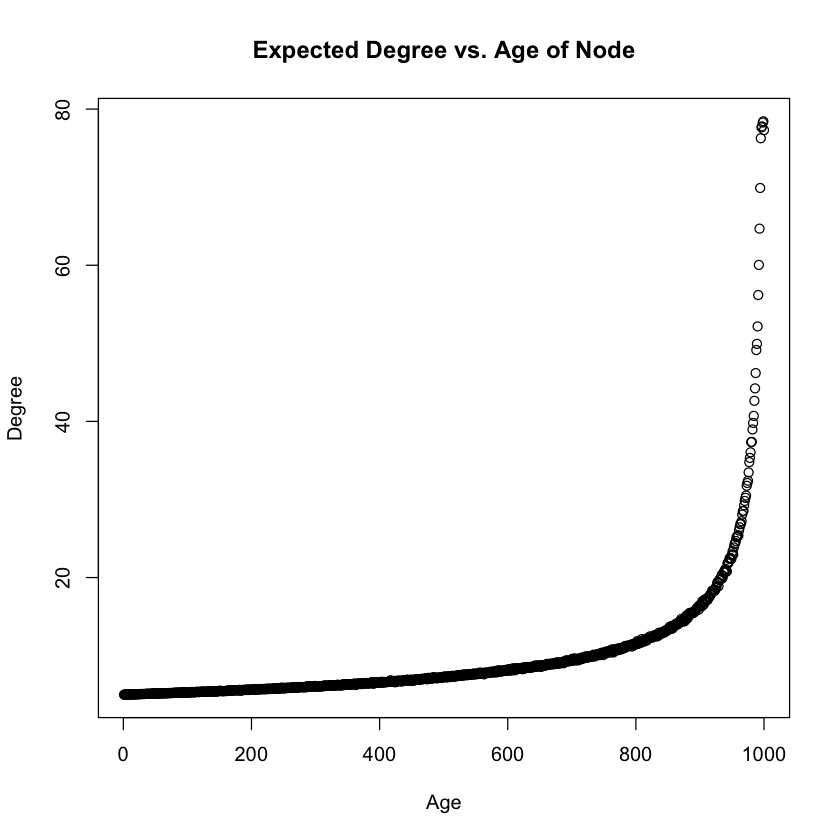

In [388]:
deg = rep(0,1000)
ages = c(1:1000)
for(i in ages){
    g = sample_pa(1000, m=5, directed=FALSE)
    deg = deg + degree(g)
}

deg = deg/1000
plot(rev(ages),deg,main="Expected Degree vs. Age of Node", xlab="Age", ylab="Degree")

Comparison of each part:

(a): All of them are connected.  
(b and c):  
m=1: For n=1000, there are 34 groups with modulary of 0.93. For n=10000, there are 112 groups with modularity of 0.98.  
m=2: For n=1000, there are 20 groups with modulary of 0.52. For n=10000, there are 37 groups with modularity of 0.53.  
m=5: For n=1000, there are 11 groups with modularity of  0.27. For n=10000, there are 15 groups with modularity of 0.29.  
(d):  
m=1: For n=1000, the slope is around -2.71. For n=10000, the slope is around -3.03.  
m=2: For n=1000, the slope is around -2.16. For n=10000, the slope is around -2.55.  
m=5: For n=1000, the slope is around -2.38. For n=10000, the slope is around -2.17.  
(e):  
m=1: For n=1000, the slope is around -0.96. For n=10000, the slope is around -1.25.  
m=2: For n=1000, the slope is around -0.91. For n=10000, the slope is around -1.32.  
m=5: For n=1000, the slope is around -0.96. For n=10000, the slope is aorund -1.13.  
(f):  
m=1: The degree climbs up to around 20.
m=2: The degree climbs up to around 40.
m=5: The degree climbs up to around 80.

(h) Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

In [441]:
g = sample_pa(1000, m=1, directed=FALSE)
degseq = degree(g)
stub_g=sample_degseq(degseq)

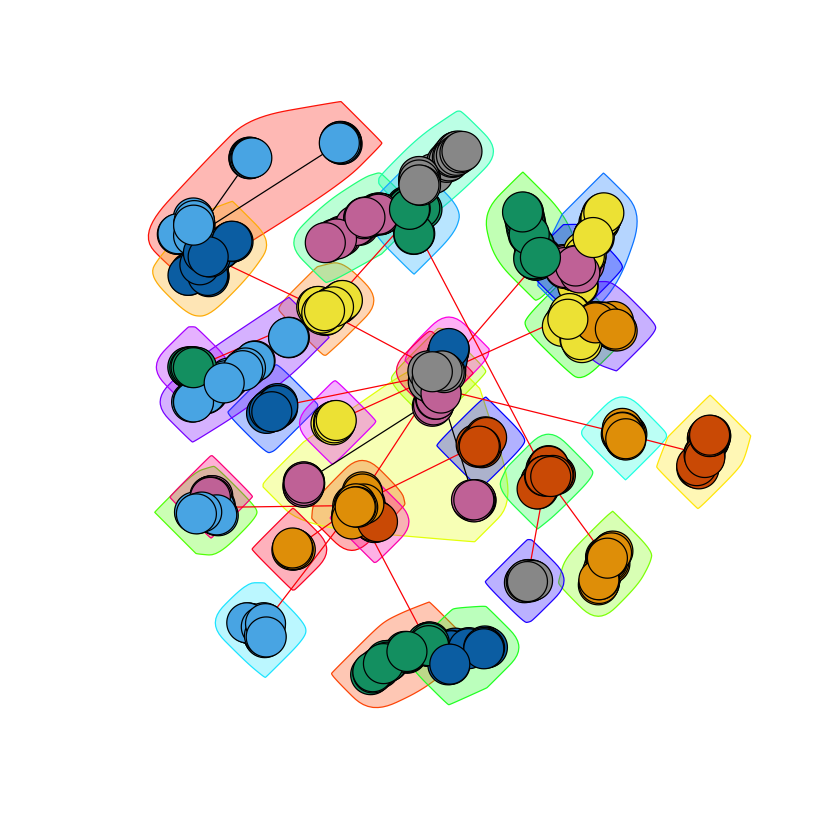

In [442]:
communities = cluster_fast_greedy(g)
plot(communities, g)

In [417]:
modularity(communities)

[1] 0.9345001

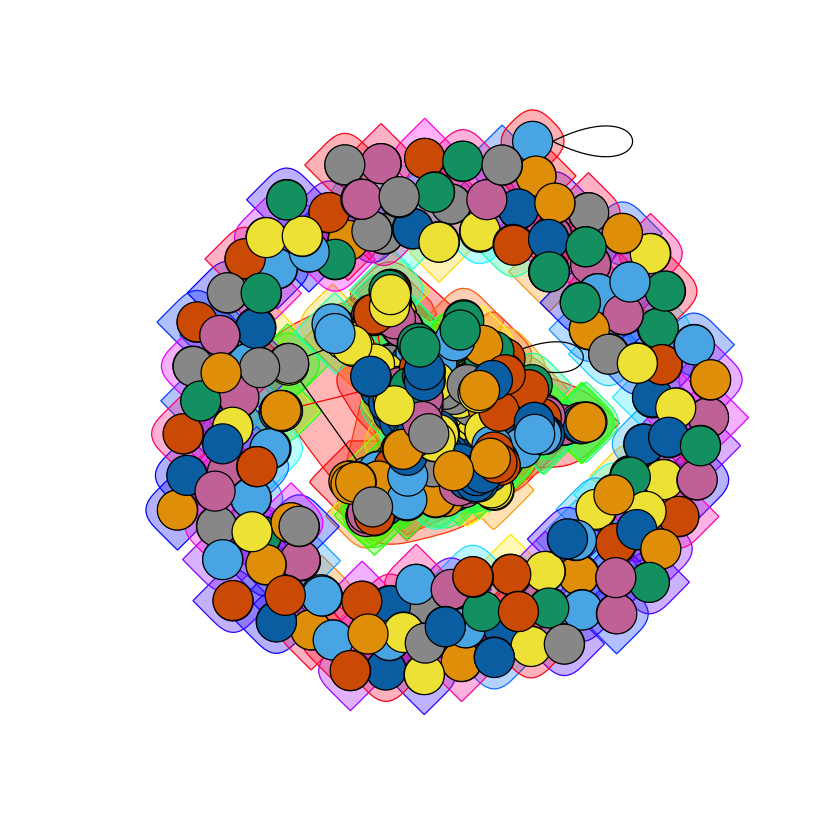

In [443]:
stub_comm=walktrap.community(stub_g)
plot(stub_comm, stub_g)

In [444]:
modularity(stub_comm)

[1] 0.7407813

Comparing the plots, the first procedure looks to be more organic where the clusters are more closely grouped together. For the second procedure, the graph looks more computationally generated from the stubs. The members of the groups are spread about throughout the graph.

3. Create a modified preferential attachment model that penalizes the age of a node

(a) Produce such an undirected network with 1000 nodes and parameters m = 1,
α = 1, β = −1, and a = c = d = 1, b = 0. Plot the degree distribution. What is the
power law exponent?

In [432]:
age_g = sample_pa_age(1000, m=1, pa.exp=1, aging.exp=-1, zero.deg.appeal=1, deg.coef=1, age.coef=1, zero.age.appeal=0, directed=FALSE)

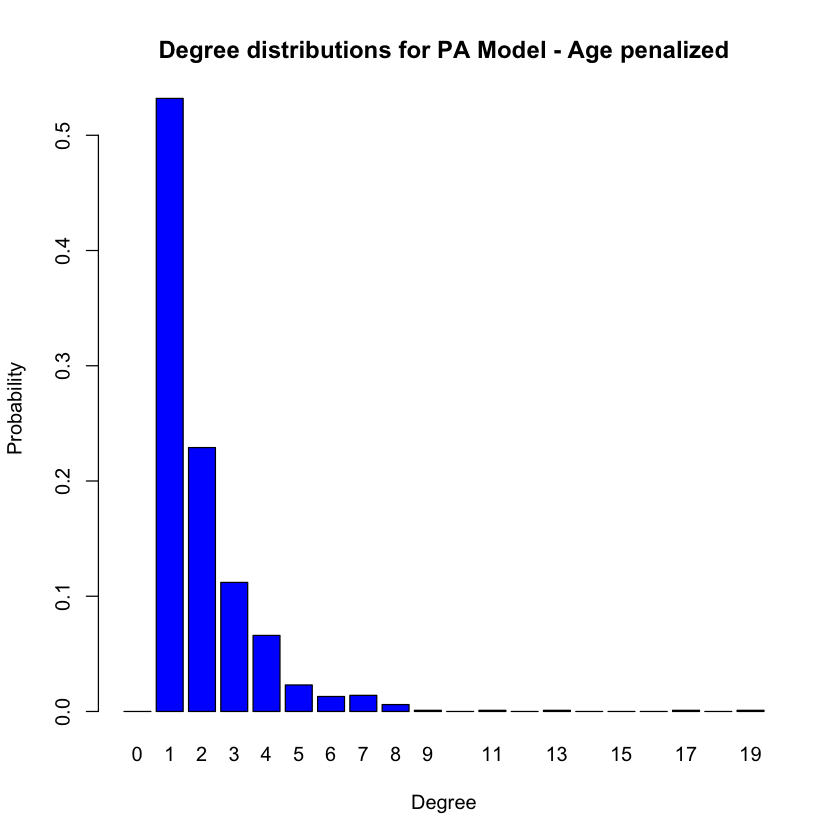

In [433]:
node_deg_dist = degree.distribution(age_g)
xVals = c(0: (length(node_deg_dist)-1))
barplot(node_deg_dist, names.arg=xVals, xlab="Degree", ylab="Probability",
    main = paste("Degree distributions for PA Model - Age penalized"),col="blue")

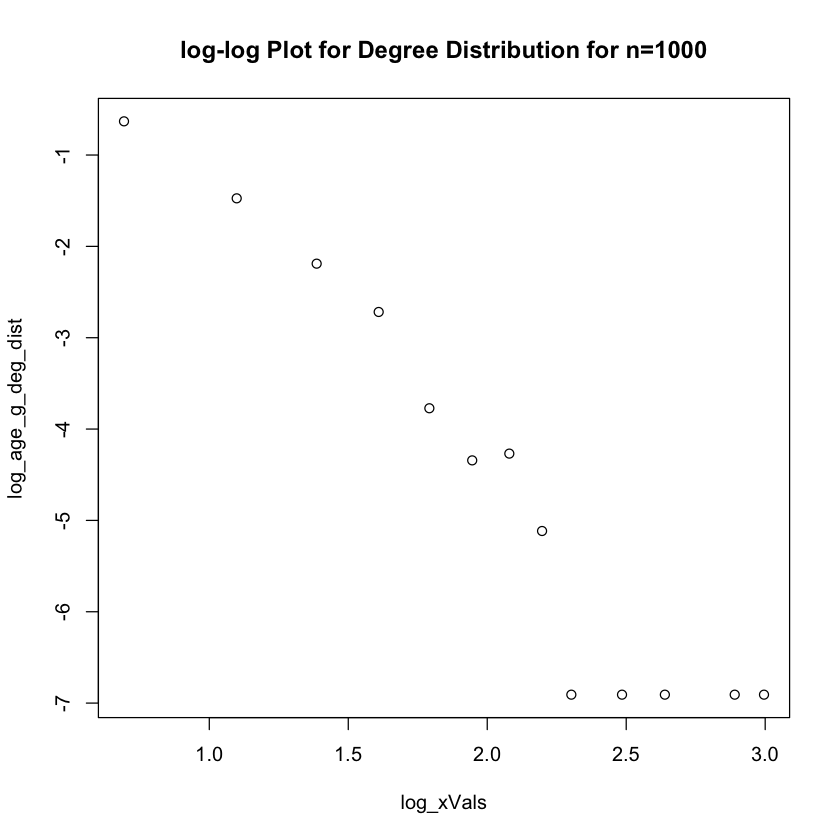

In [435]:
age_g_deg_dist = degree.distribution(age_g)
xVals = 1:length(age_g_deg_dist)
log_age_g_deg_dist = list()
log_xVals = list()
for(i in 1:length(age_g_deg_dist)){
    if(age_g_deg_dist[i] != 0){
        log_age_g_deg_dist = append(log_age_g_deg_dist, log(age_g_deg_dist[i]))
        log_xVals = append(log_xVals, log(i))
    }
}

plot(log_xVals, log_age_g_deg_dist, main="log-log Plot for Degree Distribution for n=1000")

In [436]:
lm(unlist(log_age_g_deg_dist) ~ unlist(log_xVals))


Call:
lm(formula = unlist(log_age_g_deg_dist) ~ unlist(log_xVals))

Coefficients:
      (Intercept)  unlist(log_xVals)  
            1.894             -3.204  


From the lectures, the power-law exponent corresponds to the slope of this linear regression on the log=log plot. Here, it is around -3.2.

(b) Use fast greedy method to find the community structure. What is the modularity?

In [437]:
cluster_fast_greedy(age_g)

IGRAPH clustering fast greedy, groups: 32, mod: 0.94
+ groups:
  $`1`
   [1]  39  62  63  64 142 143 282 286 334 345 373 462 465 493 519 537 541 590
  [19] 655 657 666 676 686 688 693 694 702 713 756 759 767 800 801 828 853 874
  [37] 914 923 924 928 943 946 955
  
  $`2`
   [1]  32  56  59 123 136 330 375 379 380 381 385 411 429 430 473 544 550 556
  [19] 558 559 565 567 575 580 584 616 618 619 621 625 665 672 675 678 679 680
  [37] 683 684 722 794 822 855 880
  
  + ... omitted several groups/vertices

In [438]:
modularity(cluster_fast_greedy(age_g))

[1] 0.9357716

# 2. Random Walk on Networks

1. Random walk on Erd ̈os-R ́enyi networks

(a) Create an undirected random network with 1000 nodes, and the probability p for
drawing an edge between any pair of nodes equal to 0.01

In [504]:
num_nodes = 1000
edge_prob=0.01
g = sample_gnp(num_nodes, edge_prob, directed = FALSE)

(b) Let a random walker start from a randomly selected node (no teleportation). We use t to denote the number of steps that the walker has taken. Measure the average distance (defined as the shortest path length) ⟨s(t)⟩ of the walker from his starting point at step t. Also, measure the variance $σ^2(t) = ⟨(s(t) − ⟨s(t)⟩)^2⟩$ of this distance. Plot ⟨s(t)⟩ v.s. t and $σ^2(t)$ v.s. t. Here, the average ⟨·⟩ is over random choices of the starting nodes.

In [505]:
t = 100
ver_sequence = c(1:t)

# Helper function provided for random walk
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}


random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
    
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        ver_sequence[i] = v
        PMF = transition_matrix[v, ]
        # perform random walk
        v = sample(1:vcount(g), 1, prob = PMF)
        if(i == t)
          # dis = distances(g,v= start_node, to=v)
          # dis = shortest.paths(g,)
          degree_ = degree(g,v)
    }
   return(list(distances = ver_sequence,degrees = degree_))
}

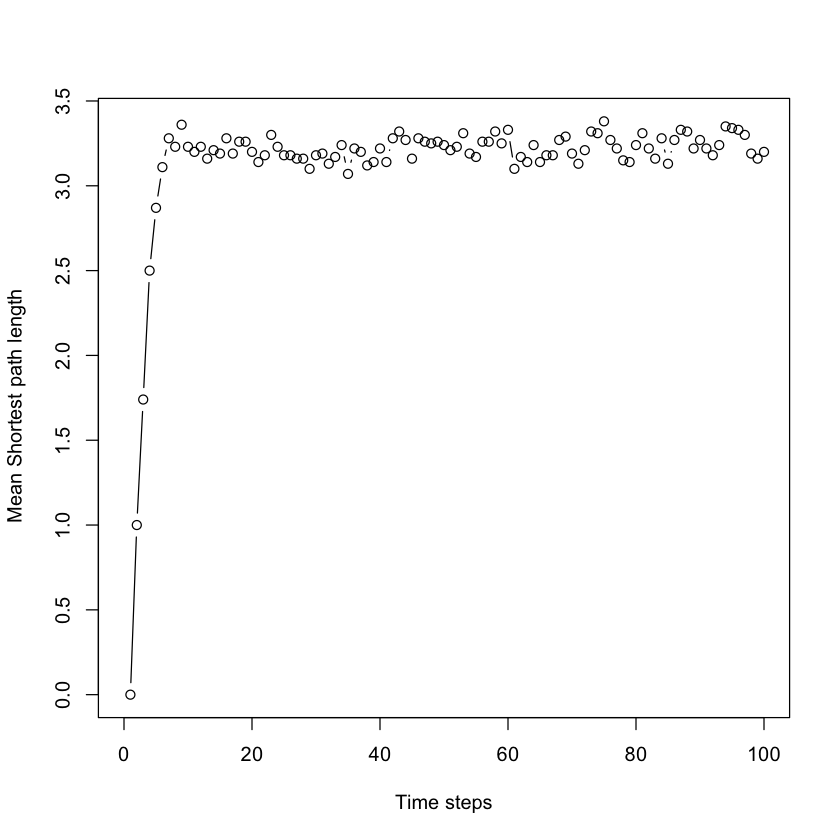

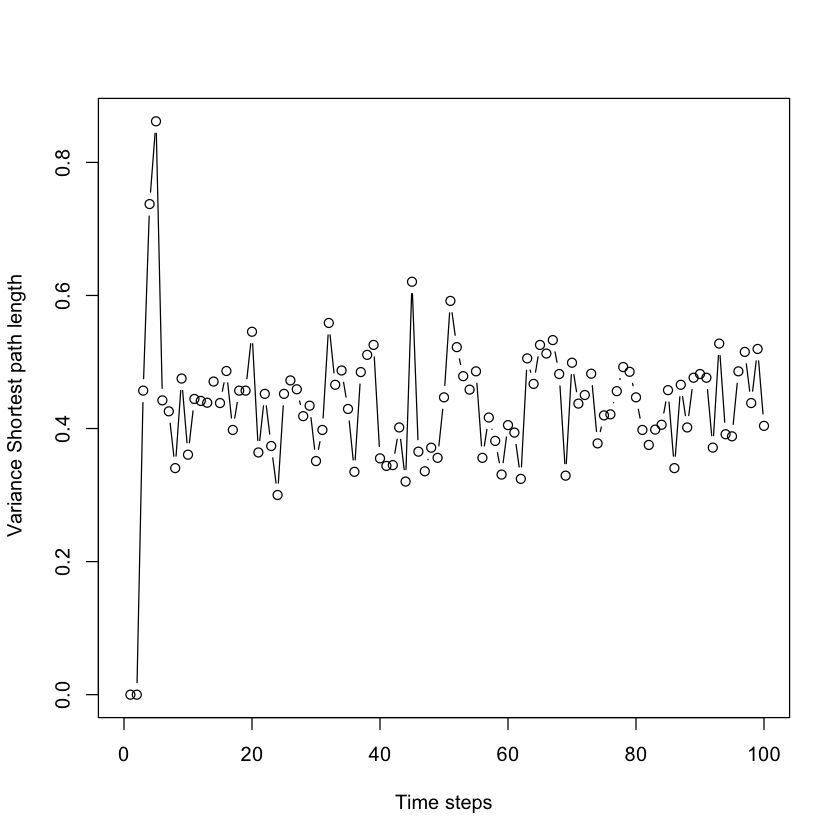

In [510]:
degree_list = c(1:100)
iters = 100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(g),100)
for(i in 1:iters){
    results = random_walk(g,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(g,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))


(c) Measure the degree distribution of the nodes reached at the end of the random walk.
How does it compare to the degree distribution of graph?

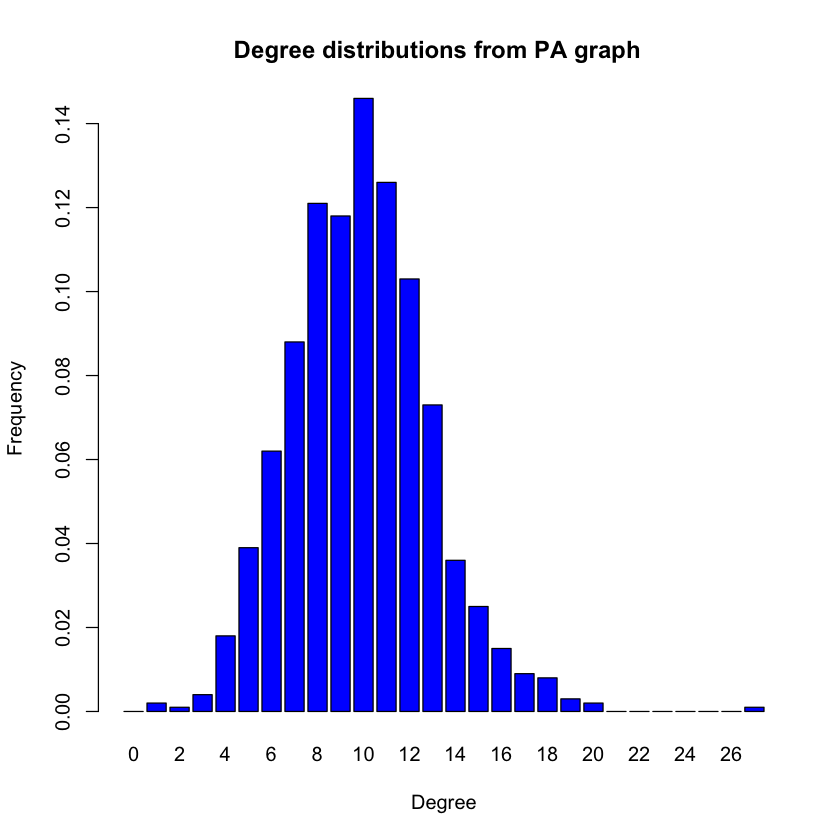

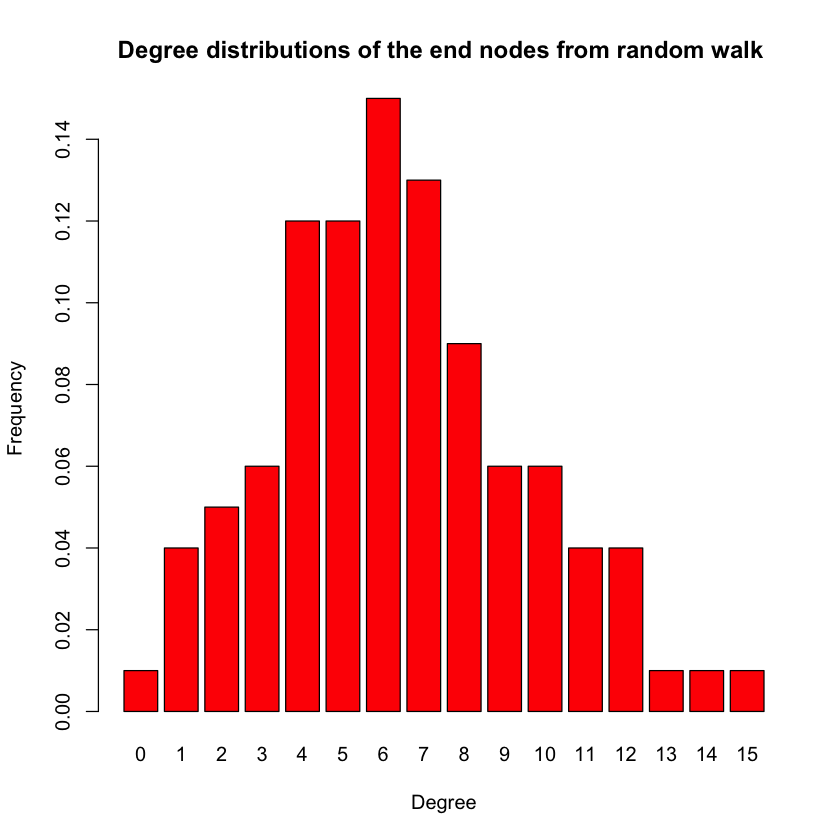

In [509]:
#  degree distribution of graph
d_dist = degree.distribution(g)
xVals = c(0: (length(d_dist) - 1))
barplot(d_dist, names.arg=xVals, xlab="Degree", ylab="Frequency",
            main = paste("Degree distributions from PA graph  " ,sep = " "), col="blue")


#  degree distribution from random walk over random nodes
freq = table(degree_list)/length(degree_list)
xVals = c(0: (length(freq) - 1))
barplot(freq, names.arg=xVals, xlab="Degree", ylab="Frequency",
            main = paste("Degree distributions of the end nodes from random walk " ,sep = " "), col="red")

They look roughly comparable in shape. The peak for the overall degree distribution is greater than the peak for the random walk distribution. The right tail is also larger for the overall distribution compared to the random walk distribution.

(d) Repeat 1(b) for undirected random networks with 10000 nodes. Compare the results
and explain qualitatively. Does the diameter of the network play a role?

In [516]:
num_nodes = 10000
edge_prob = 0.01
g2 = sample_gnp(num_nodes, edge_prob, directed = FALSE)
degree_list = c(1:100)
iters = 100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(g),100)
for(i in 1:iters){
    print(i)
    results = random_walk(g2,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(g2,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))

In [519]:
comps_g = clusters(g)
sz_g = max(comps_g$csize)
comps_g2 = clusters(g2)
sz_g2 = max(comps_g2$csize)
print(paste("Diameter when n=1000:", sz_g))
print(paste("Diameter when n=10000:", sz_g2))

[1] "Diameter when n=1000: 1000"
[1] "Diameter when n=10000: 10000"


2. Random walk on networks with fat-tailed degree distribution

(a) Generate an undirected preferential attachment network with 1000 nodes, where each
new node attaches to m = 1 old nodes.

In [520]:
pa_g = sample_pa(1000,m=1,directed=FALSE)

(b) Let a random walker start from a randomly selected node. Measure and plot ⟨s(t)⟩
v.s. t and $σ^2(t)$ v.s. t.

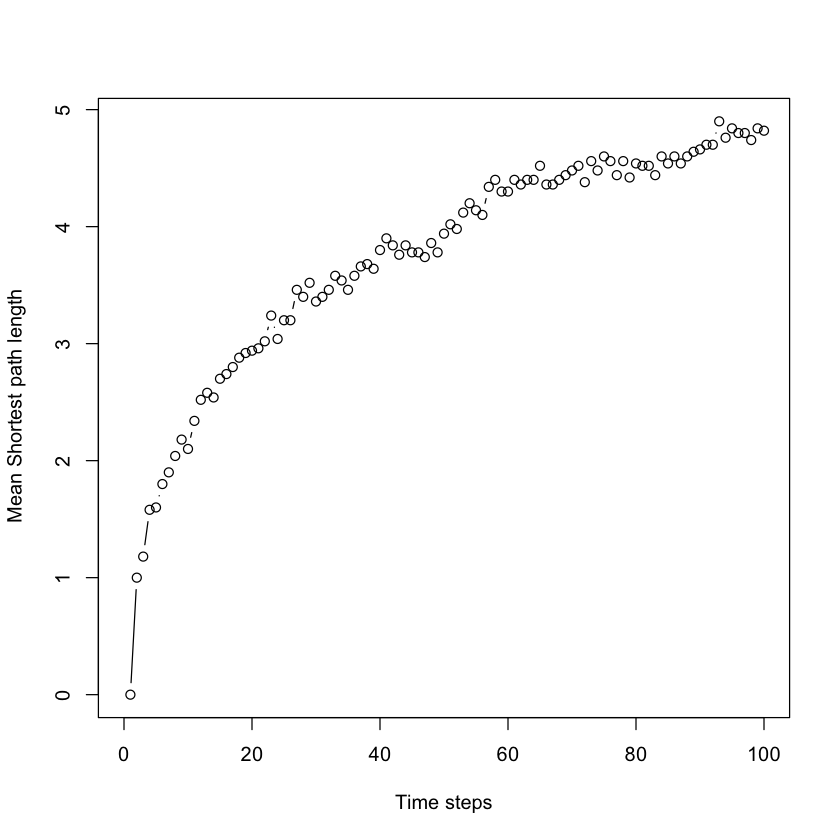

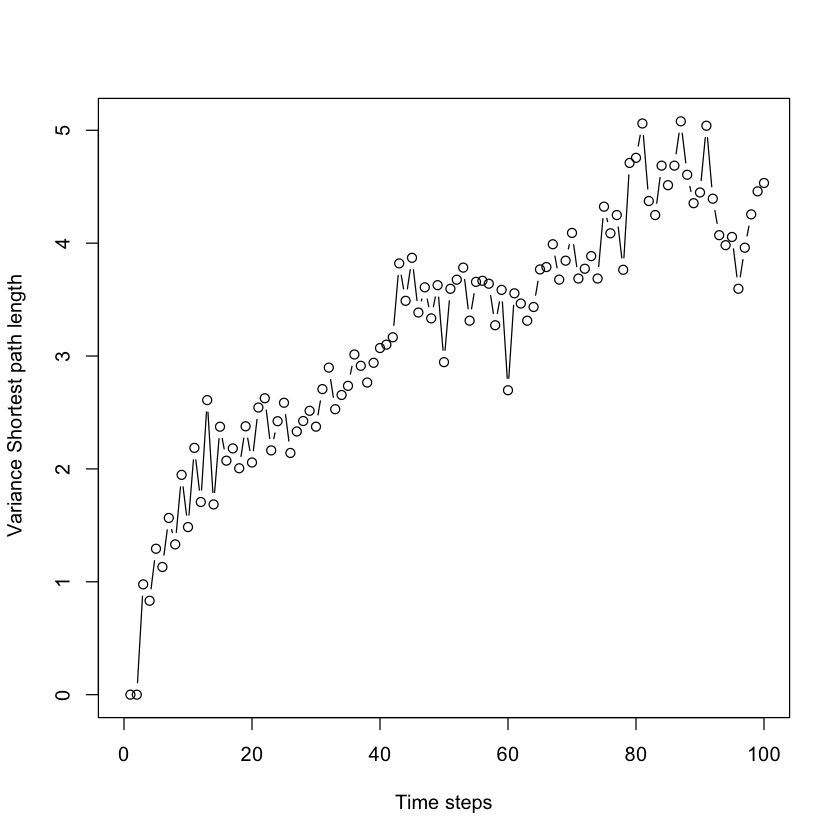

In [521]:
degree_list = c(1:100)
iters = 100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(pa_g),100)
for(i in 1:iters){
    results = random_walk(pa_g,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(pa_g,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))

(c) Measure the degree distribution of the nodes reached at the end of the random walk
on this network. How does it compare with the degree distribution of the graph?

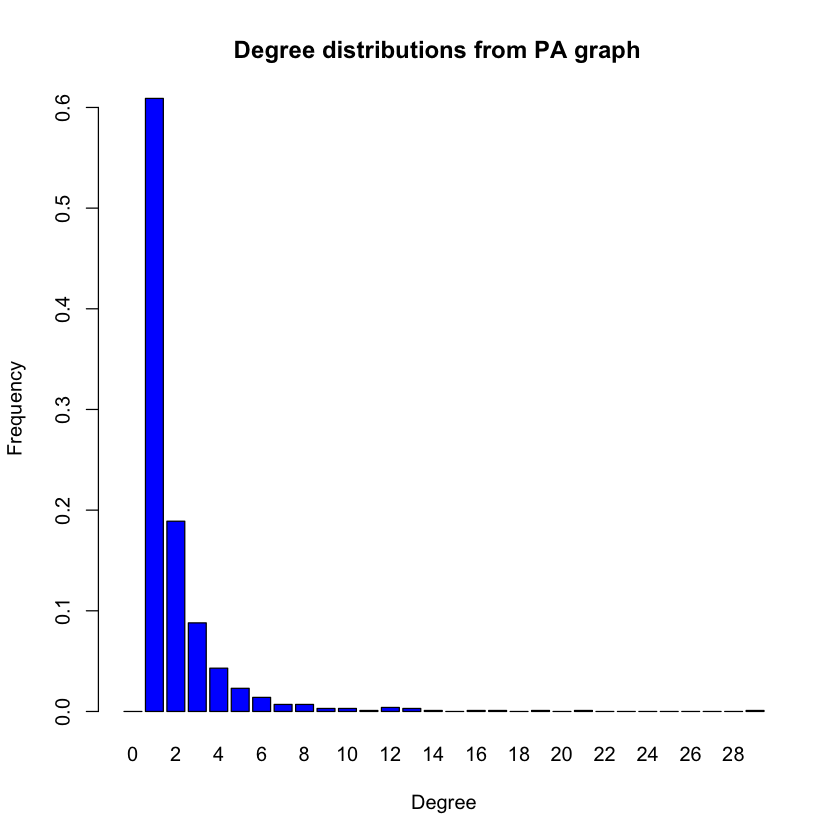

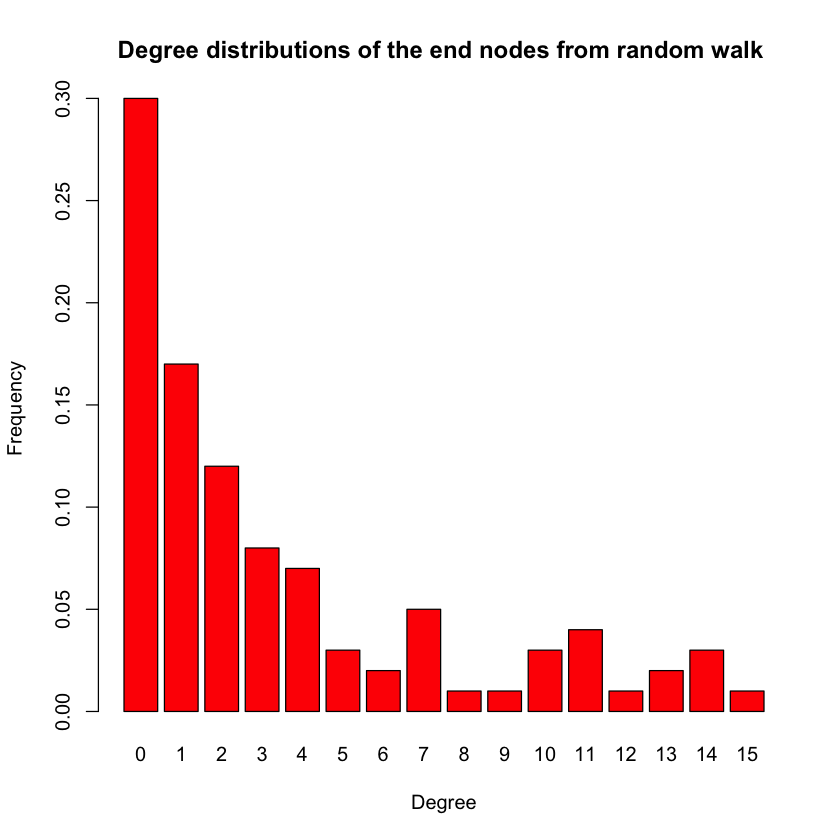

In [522]:
#  degree distribution of graph
d_dist = degree.distribution(pa_g)
xVals = c(0: (length(d_dist) - 1))
barplot(d_dist, names.arg=xVals, xlab="Degree", ylab="Frequency",
            main = paste("Degree distributions from PA graph  " ,sep = " "), col="blue")


#  degree distribution from random walk over random nodes
freq = table(degree_list)/length(degree_list)
xVals = c(0: (length(freq) - 1))
barplot(freq, names.arg=xVals, xlab="Degree", ylab="Frequency",
            main = paste("Degree distributions of the end nodes from random walk " ,sep = " "), col="red")

Comparing the overall distribution to the random walk distribution, they are both fat-tailed with 0 having the largest frequency. The overall distribution has a much larger frequency for this degree while the other ones are slightly higher. There are fluctuations on the right-hand tail of the random walk distribution that don't show up for the overall distribution. 

(d) Repeat 2(b) for preferential attachment networks with 100 and 10000 nodes, and
m = 1. Compare the results and explain qualitatively. Does the diameter of the
network play a role?

100 Nodes:

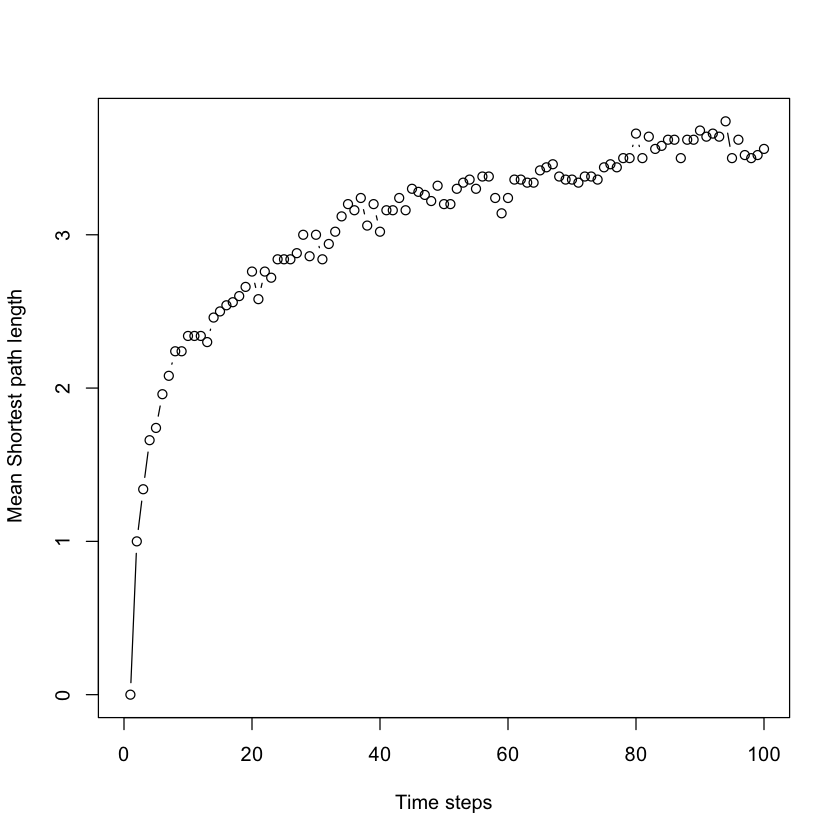

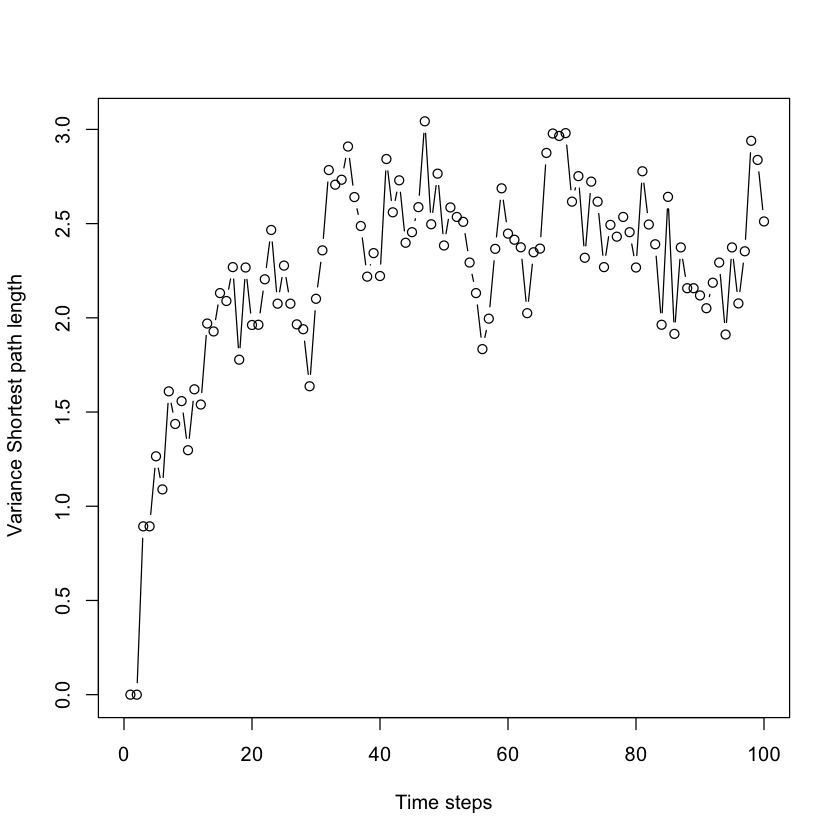

In [524]:
pa_g2 = sample_pa(100,m=1,directed=FALSE)
degree_list = c(1:100)
iters = 100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(pa_g2),100)
for(i in 1:iters){
    results = random_walk(pa_g2,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(pa_g2,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))

10000 nodes:

In [526]:
pa_g3 = sample_pa(10000,m=1,directed=FALSE)
degree_list = c(1:100)
iters = 100
distances = matrix(NA, nrow=iters, ncol=t)
start_nodes = sample(1:vcount(pa_g3),100)
for(i in 1:iters){
    results = random_walk(pa_g3,t,start_nodes[i])
    vertex_sequences = results[['distances']]
    end_node_degree = results[['degrees']][1]
    distances[i,] = shortest.paths(pa_g3,vertex_sequences,start_nodes[i])
    degree_list[i] = end_node_degree
}

plot(colMeans(distances),type="b", xlab='Time steps', ylab=' Mean Shortest path length', xlim=c(0,100))
plot(colVars(distances),type="b", xlab='Time steps', ylab=' Variance Shortest path length', xlim=c(0,100))

In [527]:
comps_g = clusters(pa_g)
sz_g = max(comps_g$csize)
comps_g2 = clusters(pa_g2)
sz_g2 = max(comps_g2$csize)
comps_g3 = clusters(pa_g3)
sz_g3 = max(comps_g3$csize)
print(paste("Diameter When n=100:", sz_g2))
print(paste("Diameter when n=1000:", sz_g))
print(paste("Diameter when n=10000:", sz_g3))

[1] "Diameter When n=100: 100"
[1] "Diameter when n=1000: 100"
[1] "Diameter when n=10000: 10000"
